# Exercise 1

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn import metrics
import time

In [41]:
def split_data(X,y):
    X_train, X_remaining, y_train, y_remaining = train_test_split(X, y,
                                                        stratify=y, 
                                                        test_size=0.25,
                                                        random_state= 0)

    X_test, X_holdout, y_test, y_holdout = train_test_split(X_remaining, y_remaining,
                                                        stratify=y_remaining, 
                                                        test_size=0.3,
                                                        random_state= 0)

    return X_train,y_train,X_test,y_test,X_holdout,y_holdout

def eval_metrics(test,pred,type="binary"):
    print("confusion matrix:",metrics.confusion_matrix(test,pred))
    print("accuracy:",metrics.accuracy_score(test,pred))

    if type == "binary":
        print("precision:",metrics.precision_score(test,pred))
        print("recall:",metrics.recall_score(test,pred))
        print("F1:",metrics.f1_score(test,pred))

    elif type == "multi":
        print("precision:",metrics.precision_score(y_test,pred1,average="macro"))
        print("recall:",metrics.recall_score(y_test,pred1,average="macro"))
        print("F1:",metrics.f1_score(y_test,pred1,average="macro"))



def cv_holdout(mod,holdout_X, holdout_y,k=5):
    cv_scores = cross_val_score(mod,holdout_X,holdout_y,cv=k)
    print("Cross validated scores:",cv_scores)

## Voting data

(kaggle data small)

In [4]:
voting_train = pd.read_csv("CongressionalVotingID.shuf.lrn.csv")
voting_train.head()

,ID,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,15,republican,n,y,n,y,y,y,n,n,n,n,n,y,unknown,unknown,n,unknown
1,326,democrat,n,y,n,n,y,y,n,n,unknown,n,n,y,y,y,n,y
2,93,democrat,y,y,y,n,n,n,y,y,n,y,y,n,n,unknown,y,y
3,350,republican,n,y,y,y,y,y,y,y,y,n,n,y,y,y,n,y
4,283,republican,y,n,n,y,y,y,n,n,n,y,n,unknown,y,y,n,n


In [5]:
voting_test = pd.read_csv("CongressionalVotingID.shuf.tes.csv")
voting_test.head()

,ID,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
0,275,y,n,n,y,y,n,y,n,n,y,n,n,n,y,y,y
1,266,y,n,y,n,n,n,y,y,y,y,n,n,n,n,n,y
2,247,n,n,y,n,y,n,y,y,y,n,n,n,n,y,unknown,y
3,328,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
4,232,n,y,n,y,y,y,n,n,y,y,n,y,y,y,n,y


In [74]:
voting_train.shape

(218, 18)

In [75]:
voting_train.columns

Index(['ID', 'class', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-crporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')

In [86]:
voting_train.groupby("class").size()

class
0    146
1     71
dtype: int64

In [12]:
voting_train = voting_train.set_index("ID")

In [94]:
voting_train.columns

Index(['class', 'handicapped-infants', 'water-project-cost-sharing',
       'adoption-of-the-budget-resolution', 'physician-fee-freeze',
       'el-salvador-aid', 'religious-groups-in-schools',
       'anti-satellite-test-ban', 'aid-to-nicaraguan-contras', 'mx-missile',
       'immigration', 'synfuels-crporation-cutback', 'education-spending',
       'superfund-right-to-sue', 'crime', 'duty-free-exports',
       'export-administration-act-south-africa'],
      dtype='object')

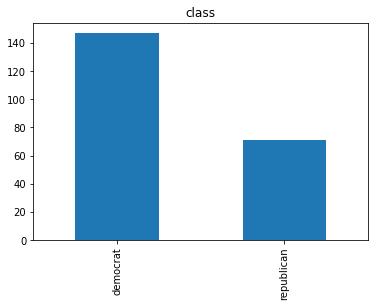

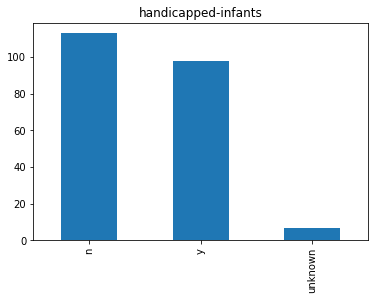

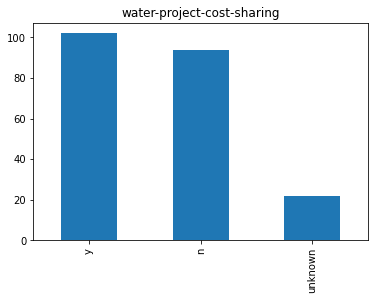

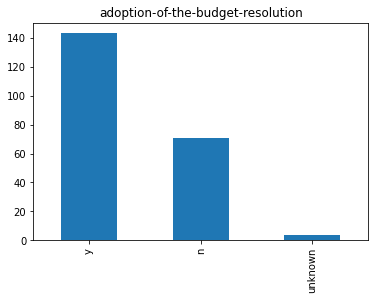

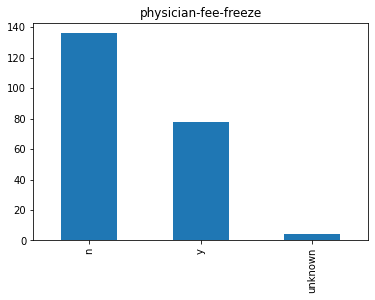

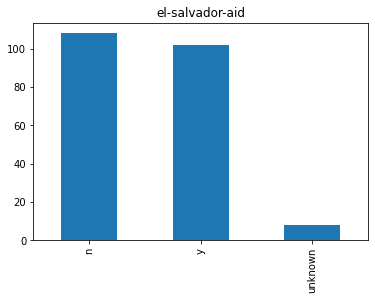

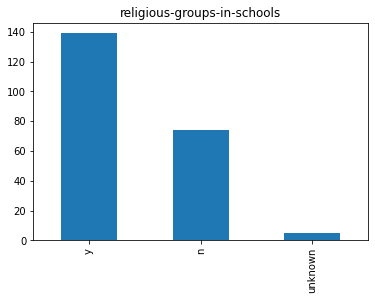

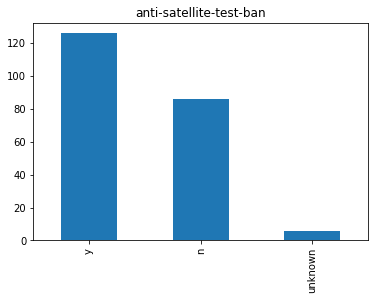

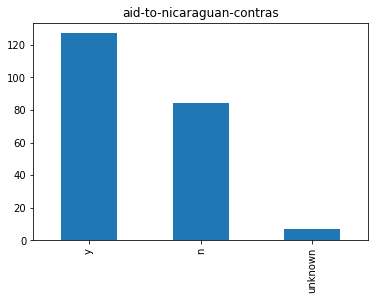

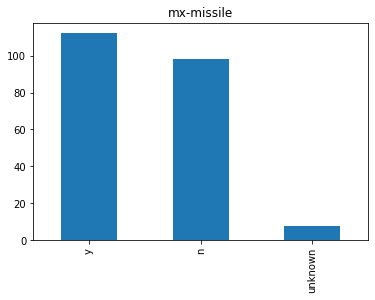

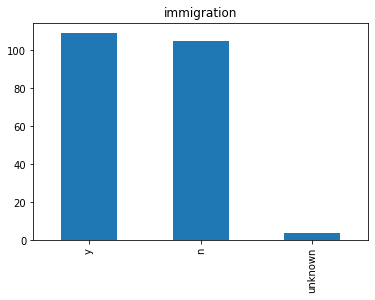

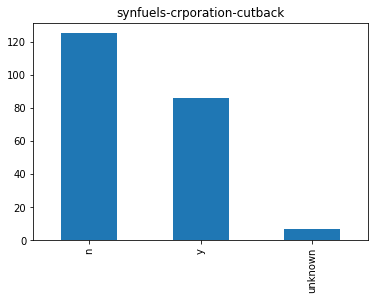

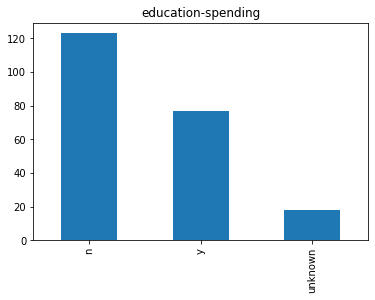

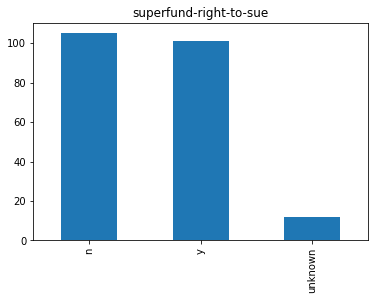

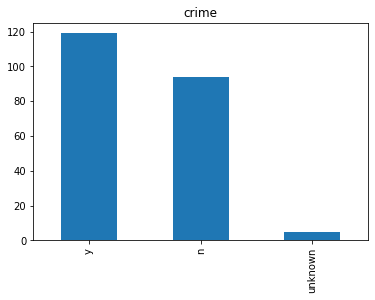

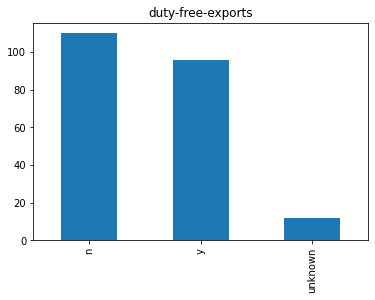

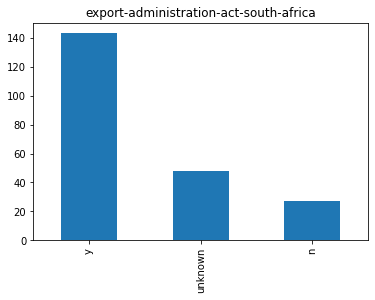

In [9]:
for col in voting_train.columns:
    voting_train[col].value_counts().plot(kind="bar",title=col)
    plt.show()

In [6]:
# overall sum of missing values
(voting_train == "unknown").sum(axis=1).sum()

177

In [7]:
# check if there is a ID where more than 50% is missing
missing_by_id = (voting_train == "unknown").sum(axis=1)

missing_by_id[missing_by_id > 7]

127    15
dtype: int64

In [8]:
index_to_drop = missing_by_id[missing_by_id > 7].index

In [9]:
# remove the one that has only missing infortmation
voting_train = voting_train.drop(index=index_to_drop)

In [14]:
#voting_train = voting_train.set_index("ID")
le = LabelEncoder()
le.fit(voting_train["handicapped-infants"])
list(le.classes_)

for col in voting_train.columns[1:]:
    voting_train[col] = le.transform(voting_train[col])


encoding: 
n = 0, unknown = 1, yes = 2

In [15]:
le_class = LabelEncoder()
le_class.fit(voting_train["class"])
list(le_class.classes_)

voting_train["class"] = le_class.transform(voting_train["class"])


In [16]:
voting_train.head()

,class,handicapped-infants,water-project-cost-sharing,adoption-of-the-budget-resolution,physician-fee-freeze,el-salvador-aid,religious-groups-in-schools,anti-satellite-test-ban,aid-to-nicaraguan-contras,mx-missile,immigration,synfuels-crporation-cutback,education-spending,superfund-right-to-sue,crime,duty-free-exports,export-administration-act-south-africa
ID,,,,,,,,,,,,,,,,,
15,1,0,2,0,2,2,2,0,0,0,0,0,2,1,1,0,1
326,0,0,2,0,0,2,2,0,0,1,0,0,2,2,2,0,2
93,0,2,2,2,0,0,0,2,2,0,2,2,0,0,1,2,2
350,1,0,2,2,2,2,2,2,2,2,0,0,2,2,2,0,2
283,1,2,0,0,2,2,2,0,0,0,2,0,1,2,2,0,0


In [17]:

X= voting_train.iloc[:,1:]
y=voting_train["class"]

X_train,y_train,X_test,y_test,X_holdout,y_holdout = split_data(X,y)

In [36]:
y_train.value_counts()

0    109
1     53
Name: class, dtype: int64

In [37]:
y_test.value_counts()

0    26
1    12
Name: class, dtype: int64

In [38]:
y_holdout.value_counts()

0    11
1     6
Name: class, dtype: int64

### Decision Tree

In [18]:
start_time = time.time()
clf = DecisionTreeClassifier(random_state=0,criterion="gini") 
clf=clf.fit(X_train,y_train) 
prediction = clf.predict(X_test) 
print("--- runtime ---" , (time.time() - start_time))


--- runtime --- 0.007003307342529297


In [19]:
cv_holdout(clf,X_holdout,y_holdout)

eval_metrics(y_test,prediction)

Cross validated scores: [1.   0.75 1.   1.   1.  ]
confusion matrix: [[26  0]
 [ 1 11]]
accuracy: 0.9736842105263158
precision: 1.0
recall: 0.9166666666666666
F1: 0.9565217391304348


In [22]:
plot_tree(clf)

NameError: name 'plot_tree' is not defined

In [25]:
# FOR kaggle submission

voting_test = voting_test.set_index("ID")

le = LabelEncoder()
le.fit(voting_test["handicapped-infants"])
list(le.classes_)

for col in voting_test.columns:
    voting_test[col] = le.transform(voting_test[col])

# model on all data
clf = DecisionTreeClassifier(random_state=0,criterion="gini") 
clf=clf.fit(X,y) # train 
prediction = clf.predict(voting_test) 

# predict
prediction = le_class.inverse_transform(prediction)

result = pd.DataFrame(prediction,index= voting_test.index)

result.columns = ["class"]

result.to_csv("voting_test_result_DT.csv")

In [26]:
# different settings
start_time = time.time()
clf = DecisionTreeClassifier(random_state=0,criterion="entropy",max_features=5) # defining decision tree classifier
clf=clf.fit(X_train,y_train) 
prediction = clf.predict(X_test) 
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_holdout,y_holdout)
eval_metrics(y_test,prediction)

--- runtime --- 0.011997699737548828
Cross validated scores: [1.   0.75 1.   1.   1.  ]
confusion matrix: [[25  1]
 [ 0 12]]
accuracy: 0.9736842105263158
precision: 0.9230769230769231
recall: 1.0
F1: 0.9600000000000001


In [27]:
# different settings
clf = DecisionTreeClassifier(random_state=0,criterion="entropy",min_samples_split=5) 
clf=clf.fit(X_train,y_train) # train 
prediction = clf.predict(X_test) 

cv_holdout(clf,X_holdout,y_holdout)
eval_metrics(y_test,prediction)

Cross validated scores: [1.   0.75 1.   1.   1.  ]
confusion matrix: [[26  0]
 [ 0 12]]
accuracy: 1.0
precision: 1.0
recall: 1.0
F1: 1.0


### Random forest

In [28]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_train,y_train)
rf_prediction = clf.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_holdout,y_holdout)
eval_metrics(y_test,rf_prediction)


--- runtime --- 0.24999713897705078
Cross validated scores: [1.         0.75       0.66666667 1.         1.        ]
confusion matrix: [[25  1]
 [ 0 12]]
accuracy: 0.9736842105263158
precision: 0.9230769230769231
recall: 1.0
F1: 0.9600000000000001


In [29]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100,random_state=0,criterion="entropy")
clf.fit(X_train,y_train)
rf_prediction = clf.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_holdout,y_holdout)
eval_metrics(y_test,rf_prediction)

--- runtime --- 0.3149983882904053
Cross validated scores: [1.         0.75       0.66666667 1.         1.        ]
confusion matrix: [[25  1]
 [ 0 12]]
accuracy: 0.9736842105263158
precision: 0.9230769230769231
recall: 1.0
F1: 0.9600000000000001


In [30]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100,random_state=0,criterion="gini",min_samples_split=5)
clf.fit(X_train,y_train)
rf_prediction = clf.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_holdout,y_holdout)
eval_metrics(y_test,rf_prediction)

--- runtime --- 0.22399616241455078
Cross validated scores: [1.         0.75       0.66666667 1.         1.        ]
confusion matrix: [[25  1]
 [ 0 12]]
accuracy: 0.9736842105263158
precision: 0.9230769230769231
recall: 1.0
F1: 0.9600000000000001


In [49]:
# FOR kaggle submission

# model on all data
clf = RandomForestClassifier(n_estimators=100,random_state=0,criterion="gini",min_samples_split=5)
clf.fit(X,y)
rf_prediction = clf.predict(voting_test)

# predict
prediction = le_class.inverse_transform(rf_prediction)
result = pd.DataFrame(prediction,index= voting_test.index)

result.columns = ["class"]
print(result)
result.to_csv("voting_test_result_RF.csv")

          class
ID             
275  republican
266    democrat
247    democrat
328  republican
232  republican
..          ...
291    democrat
76     democrat
123  republican
416    democrat
309  republican

[217 rows x 1 columns]


### KNN

In [31]:
knn = KNeighborsClassifier(n_neighbors=5)

start_time = time.time()
knn.fit(X_train,y_train)
knn_prediction= knn.predict(X_test) 
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(knn,X_holdout,y_holdout)
eval_metrics(y_test,knn_prediction)

--- runtime --- 0.03499460220336914
Cross validated scores: [1.         0.75       0.66666667 1.         1.        ]
confusion matrix: [[25  1]
 [ 0 12]]
accuracy: 0.9736842105263158
precision: 0.9230769230769231
recall: 1.0
F1: 0.9600000000000001


In [32]:
knn = KNeighborsClassifier(n_neighbors=5,metric="hamming")

# Train the model using the training sets
start_time = time.time()
knn.fit(X_train,y_train)
knn_prediction2= knn.predict(X_test) 
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(knn,X_holdout,y_holdout)
eval_metrics(y_test,knn_prediction2)

--- runtime --- 0.009000301361083984
Cross validated scores: [1.         0.75       0.66666667 1.         1.        ]
confusion matrix: [[25  1]
 [ 0 12]]
accuracy: 0.9736842105263158
precision: 0.9230769230769231
recall: 1.0
F1: 0.9600000000000001


In [33]:
knn = KNeighborsClassifier(n_neighbors=5,metric="hamming",weights="distance")

# Train the model using the training sets
start_time = time.time()
knn.fit(X_train,y_train)
knn_prediction3= knn.predict(X_test) 
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(knn,X_holdout,y_holdout)
eval_metrics(y_test,knn_prediction3)

--- runtime --- 0.011998176574707031
Cross validated scores: [1.         0.75       0.66666667 1.         1.        ]
confusion matrix: [[25  1]
 [ 0 12]]
accuracy: 0.9736842105263158
precision: 0.9230769230769231
recall: 1.0
F1: 0.9600000000000001


## Location data

(kaggle data large)

In [34]:
locationTrain = pd.read_csv("Location446-30cls-5k.lrn.csv")
locationTrain.head()

,ID,class,1,2,3,4,5,6,7,8,...,437,438,439,440,441,442,443,444,445,446
0,0,11,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,9,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,8,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,4,3,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [111]:
locationTrain.shape

(4000, 448)

In [35]:
locationTest = pd.read_csv("Location446-30cls-5k.tes.csv")
locationTest.head()

,ID,1,2,3,4,5,6,7,8,9,...,437,438,439,440,441,442,443,444,445,446
0,4000,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,4001,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,4002,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4003,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,4004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [113]:
len(locationTrain["class"].unique())

30

In [36]:
locationTrain = locationTrain.set_index("ID")
locationTest = locationTest.set_index("ID")

In [37]:
#loc_train = loc_train.set_index("ID")

for c in locationTrain.columns:
    print( "---- %s ---" % c)
    print( locationTrain[c].value_counts(), "\n\n")

---- class ---
8     250
20    211
21    181
10    173
15    171
6     150
11    149
19    146
17    144
12    142
2     141
4     135
30    135
24    133
1     132
23    128
28    127
27    126
3     124
26    119
9     114
29    113
18    103
13    103
25    100
14     99
22     98
7      90
16     83
5      80
Name: class, dtype: int64 


---- 1 ---
0    3775
1     225
Name: 1, dtype: int64 


---- 2 ---
0    3283
1     717
Name: 2, dtype: int64 


---- 3 ---
0    3808
1     192
Name: 3, dtype: int64 


---- 4 ---
1    2124
0    1876
Name: 4, dtype: int64 


---- 5 ---
0    3616
1     384
Name: 5, dtype: int64 


---- 6 ---
0    3572
1     428
Name: 6, dtype: int64 


---- 7 ---
0    3880
1     120
Name: 7, dtype: int64 


---- 8 ---
0    3773
1     227
Name: 8, dtype: int64 


---- 9 ---
0    3349
1     651
Name: 9, dtype: int64 


---- 10 ---
0    3746
1     254
Name: 10, dtype: int64 


---- 11 ---
0    3509
1     491
Name: 11, dtype: int64 


---- 12 ---
0    3474
1     526
Name

In [116]:
#check for missing data
locationTrain.isna().sum().sum()

0

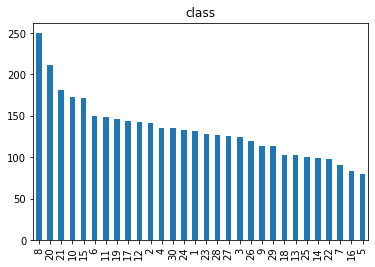

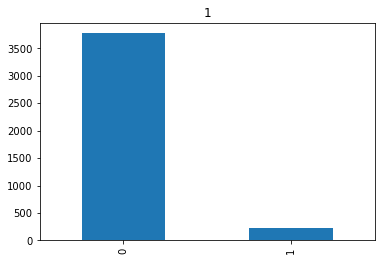

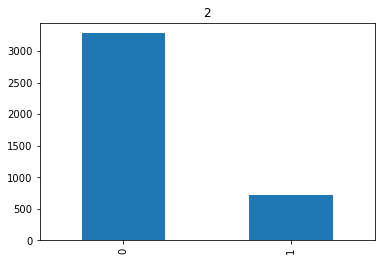

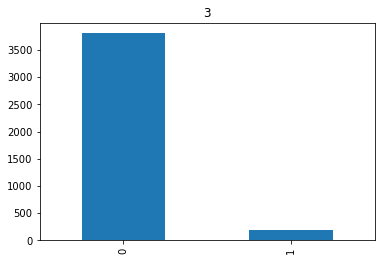

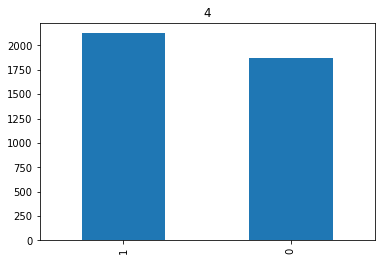

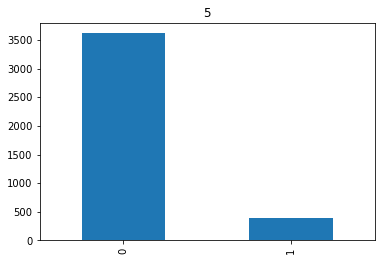

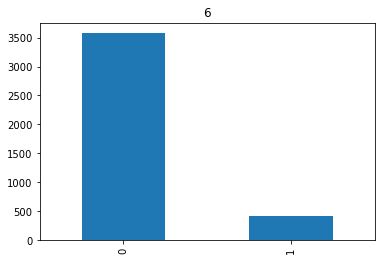

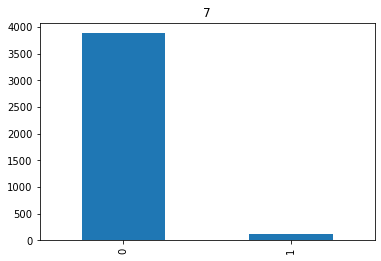

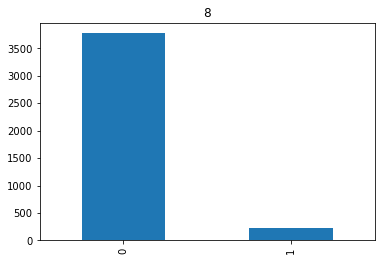

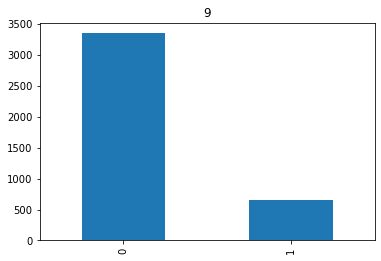

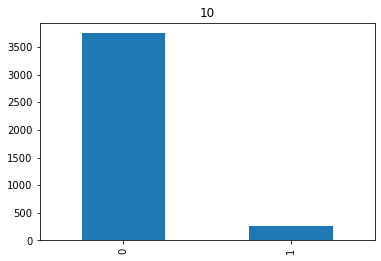

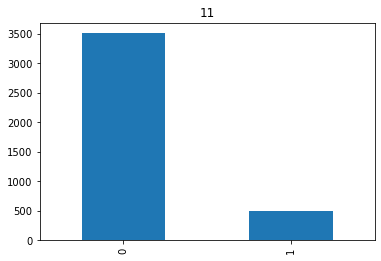

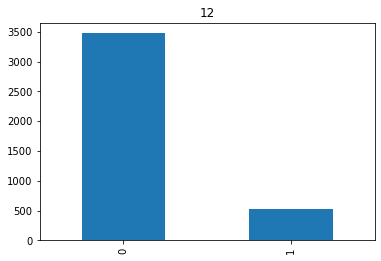

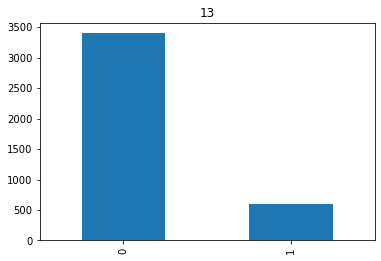

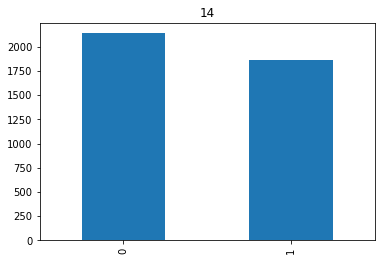

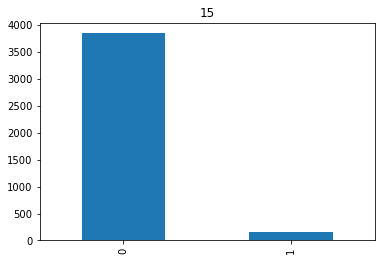

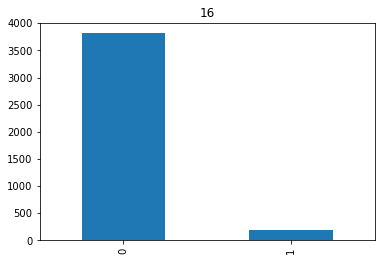

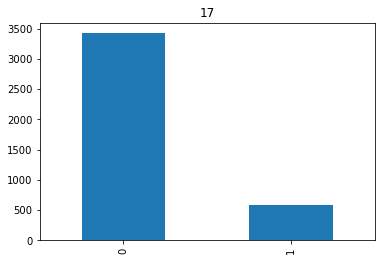

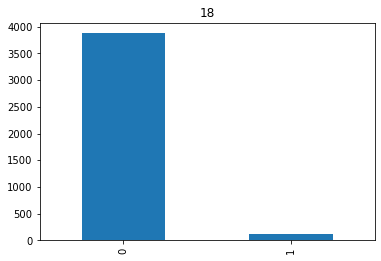

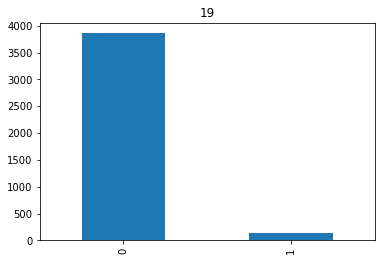

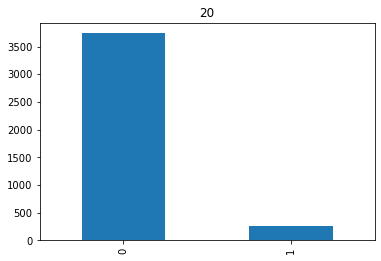

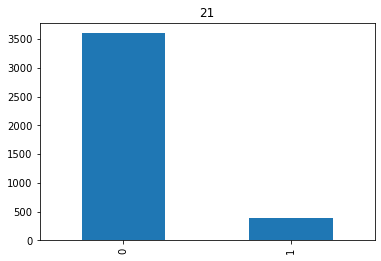

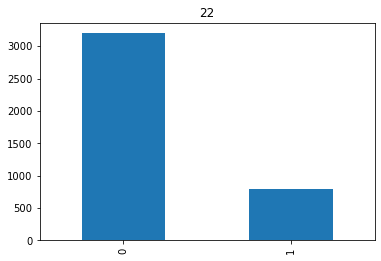

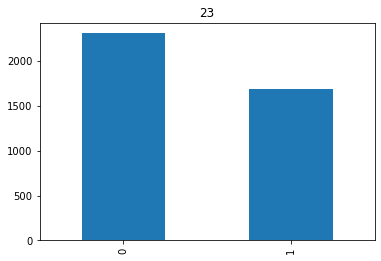

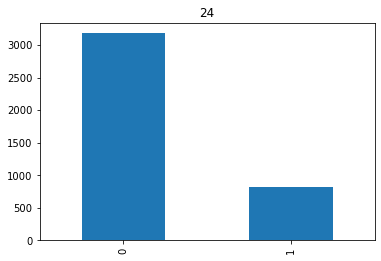

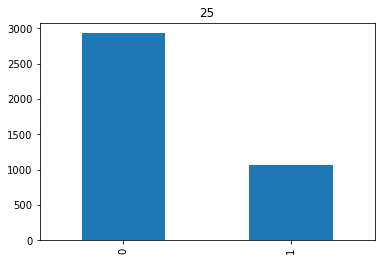

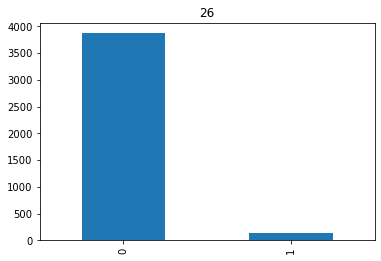

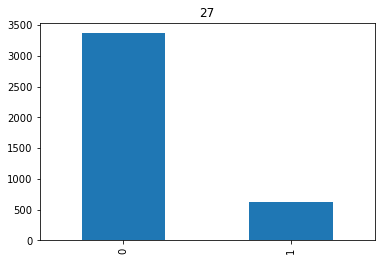

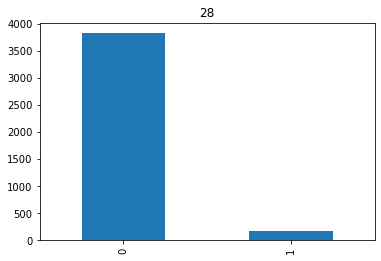

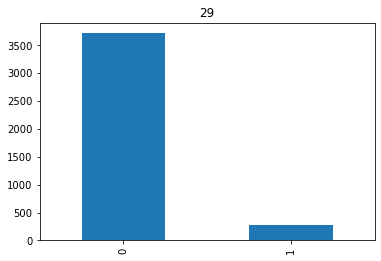

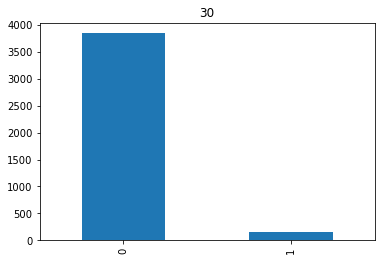

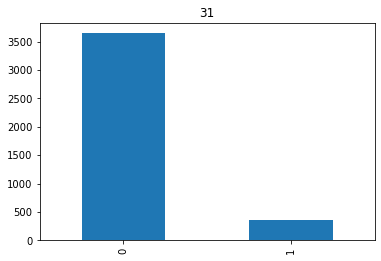

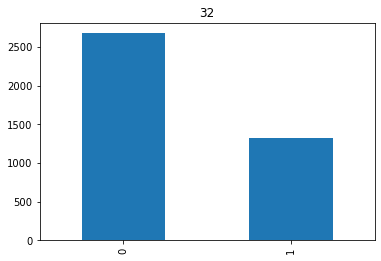

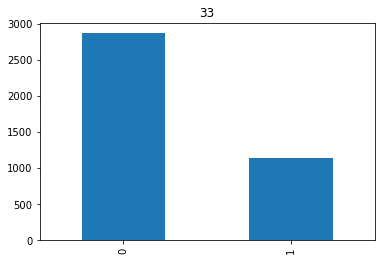

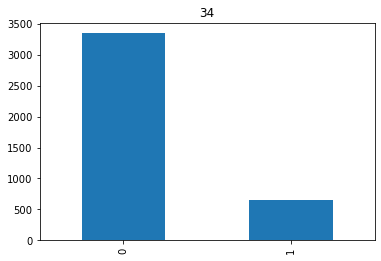

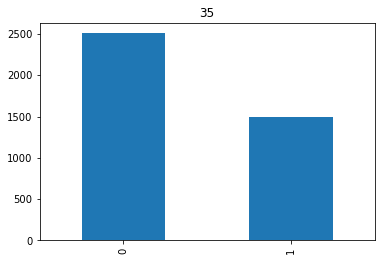

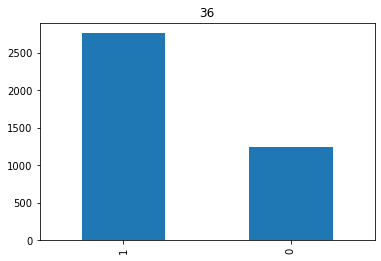

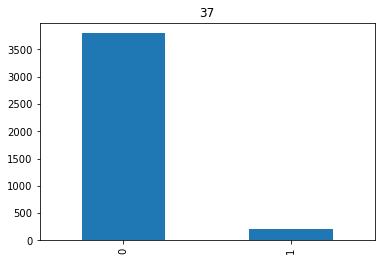

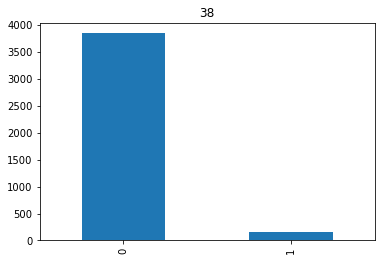

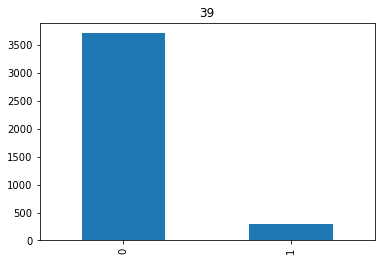

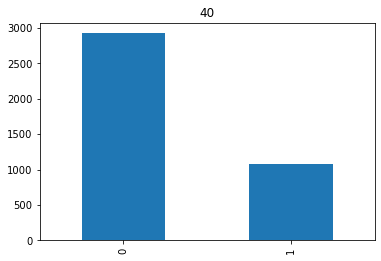

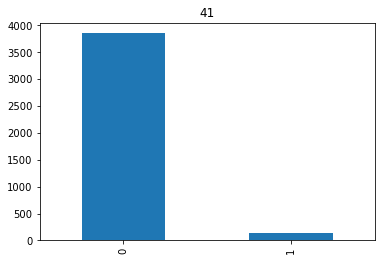

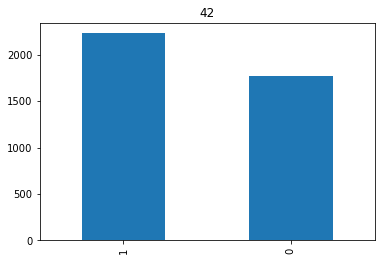

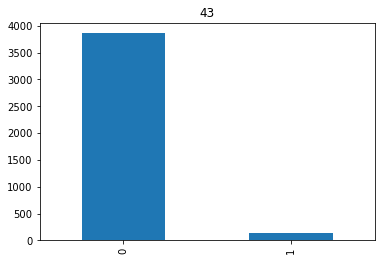

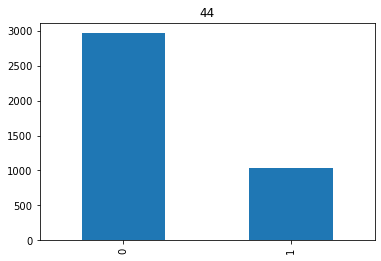

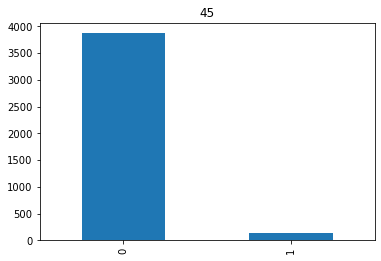

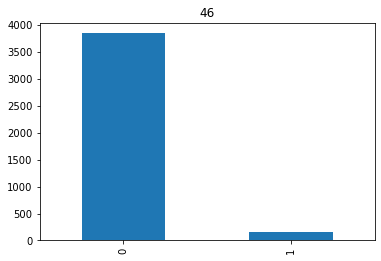

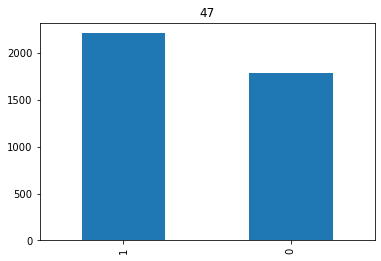

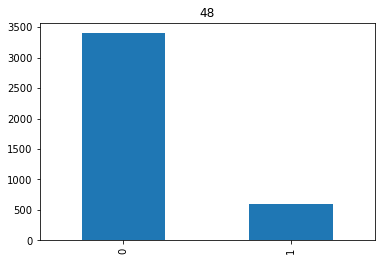

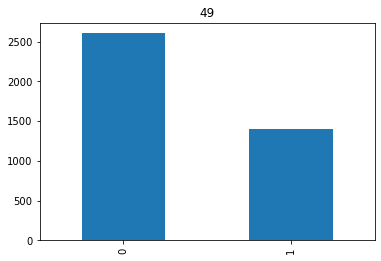

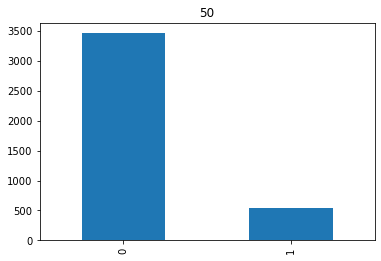

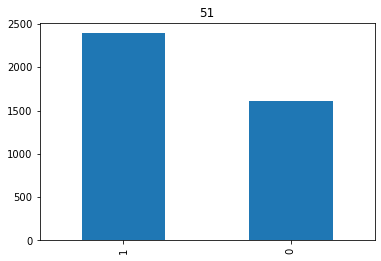

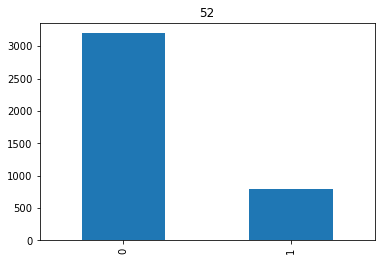

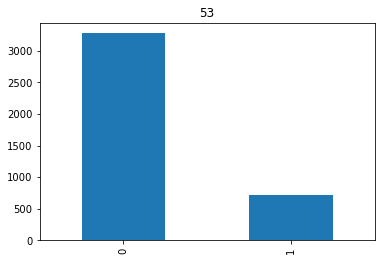

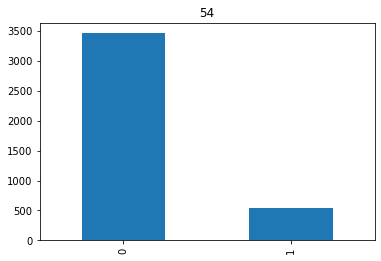

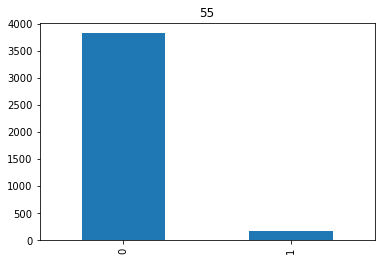

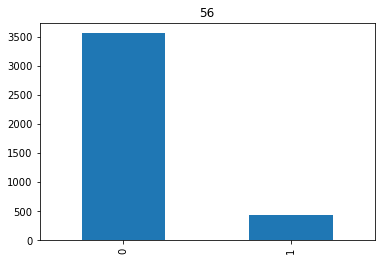

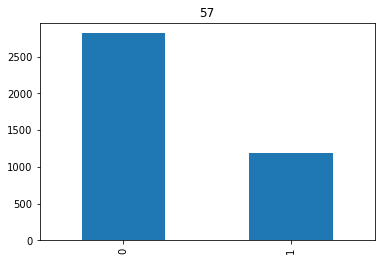

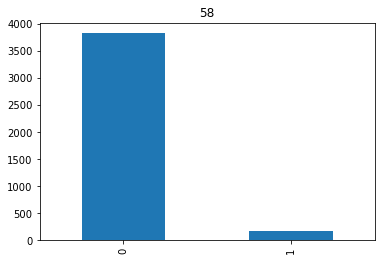

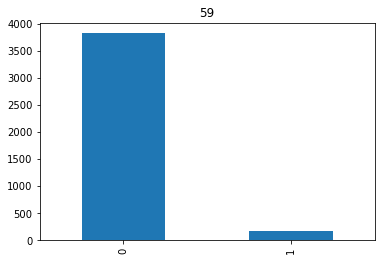

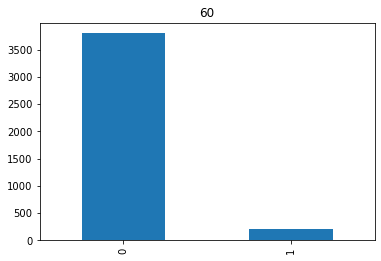

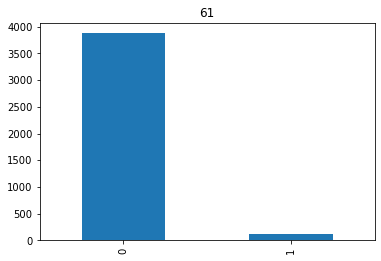

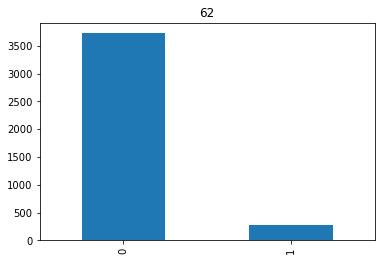

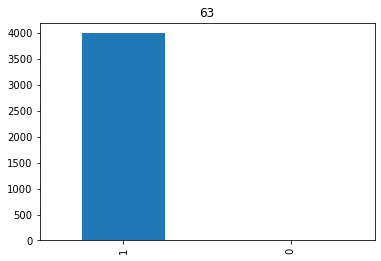

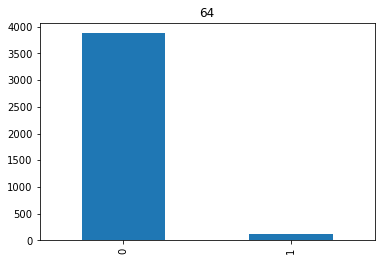

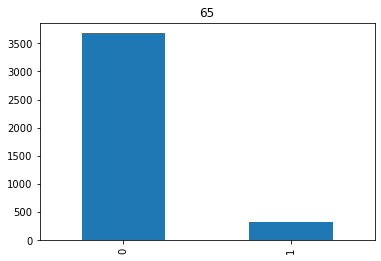

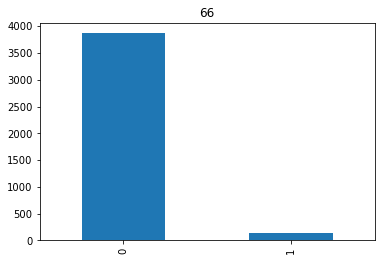

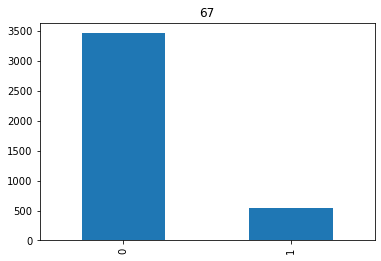

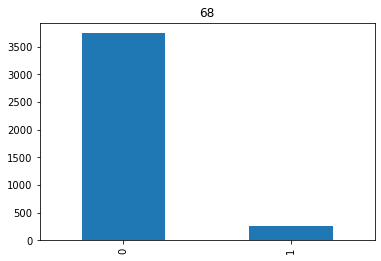

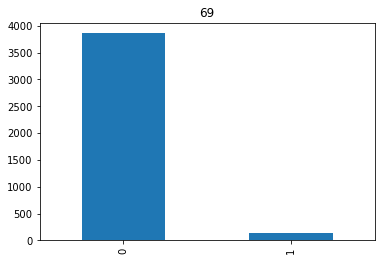

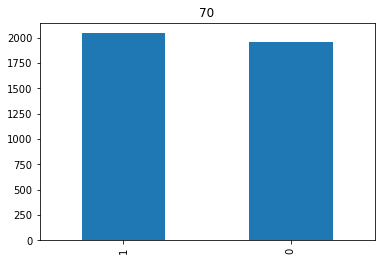

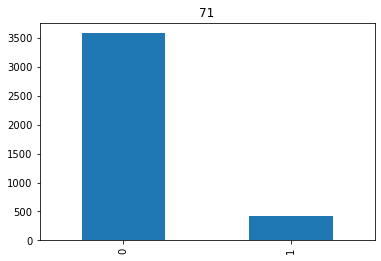

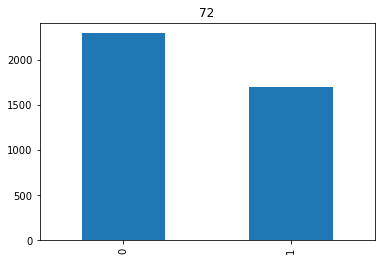

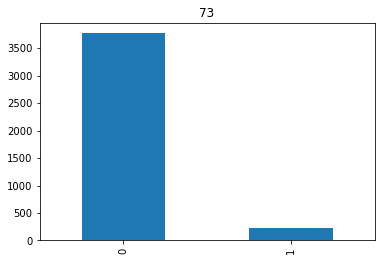

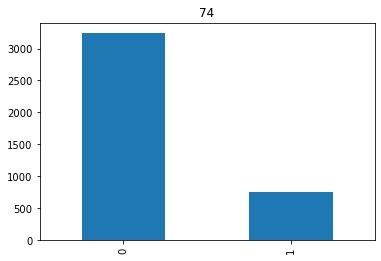

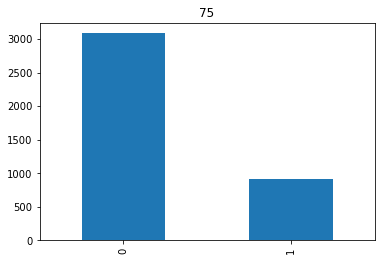

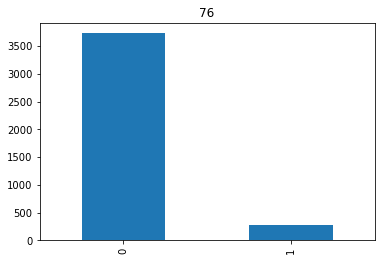

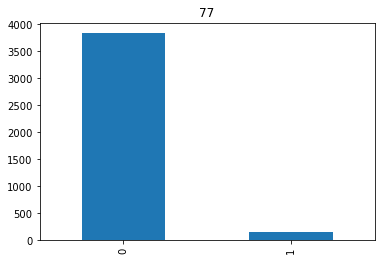

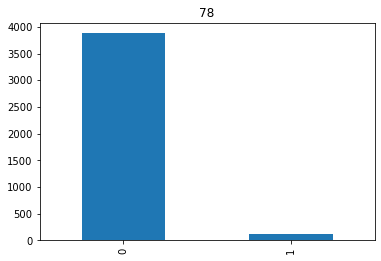

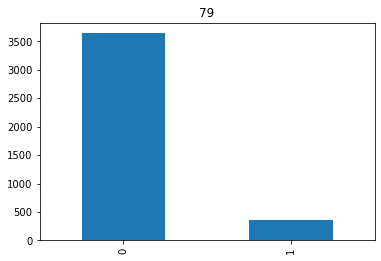

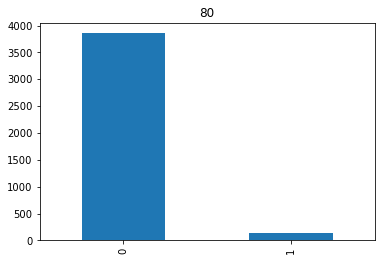

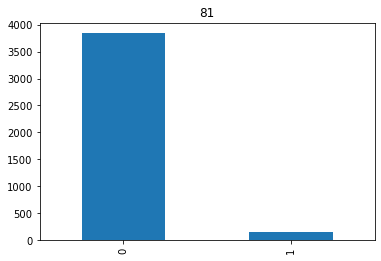

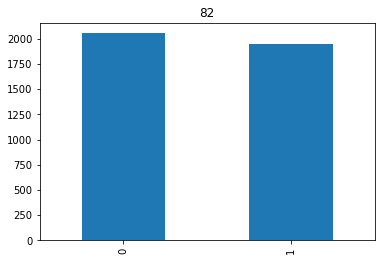

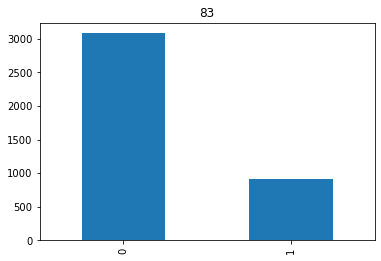

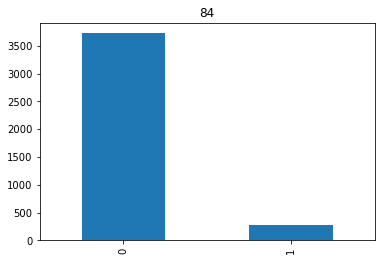

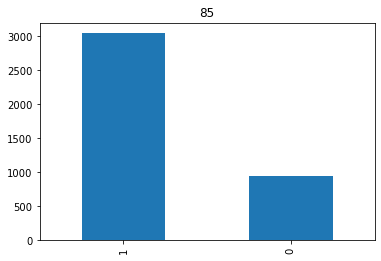

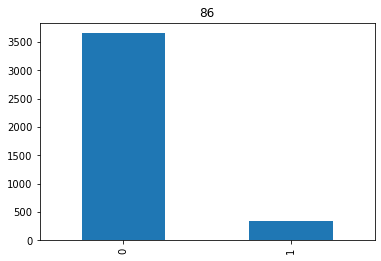

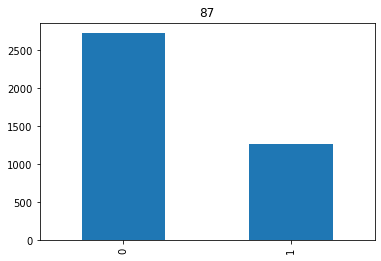

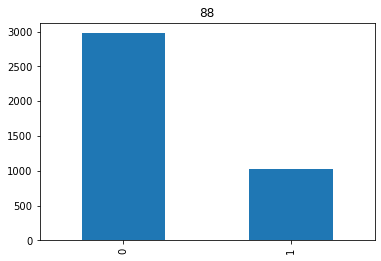

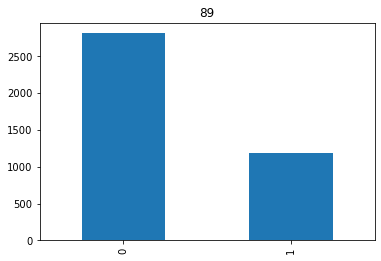

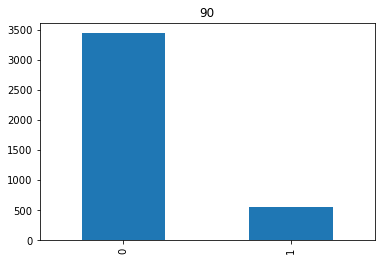

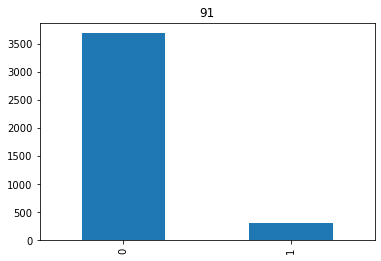

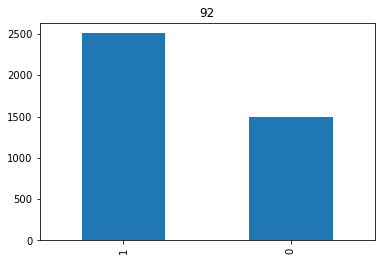

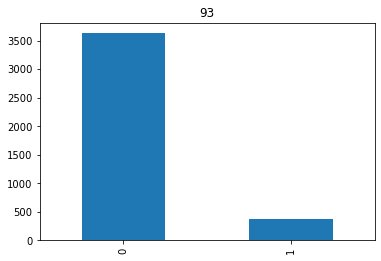

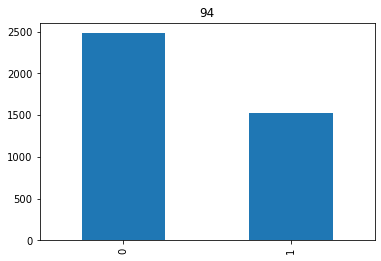

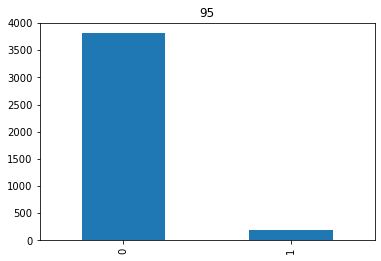

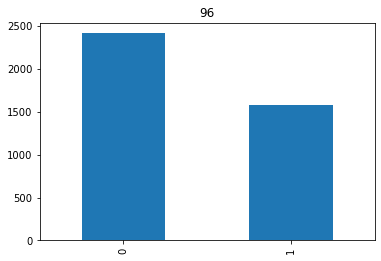

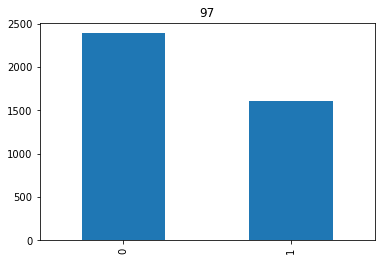

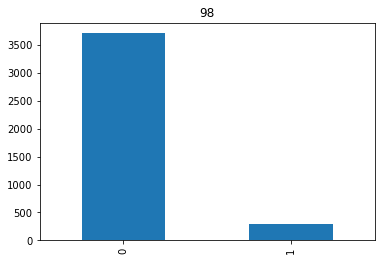

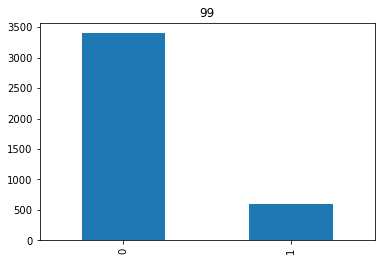

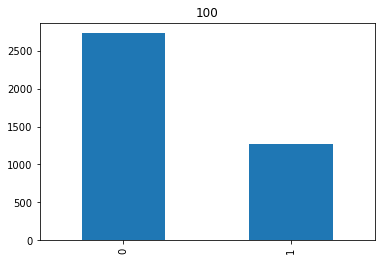

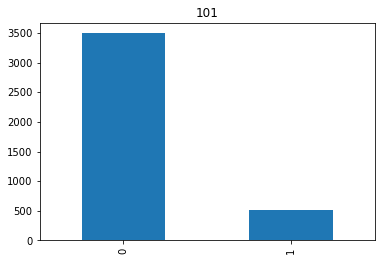

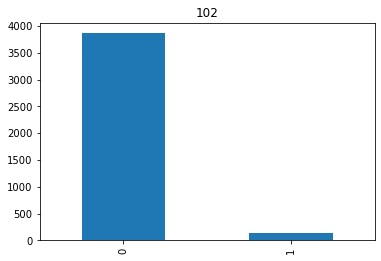

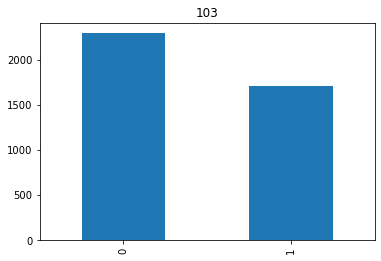

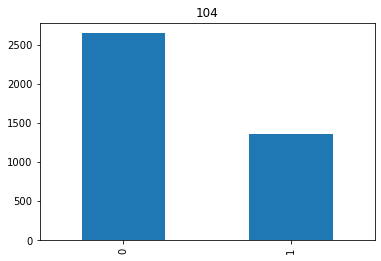

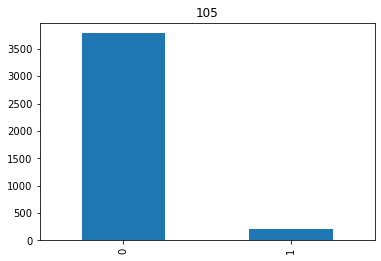

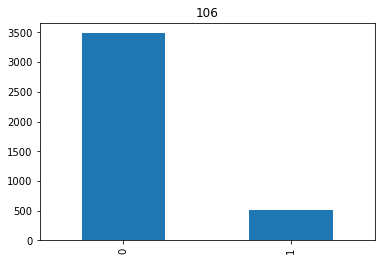

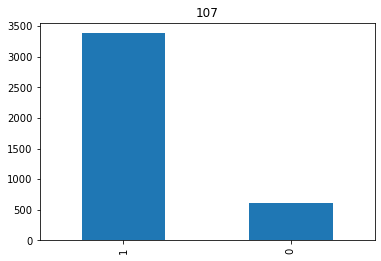

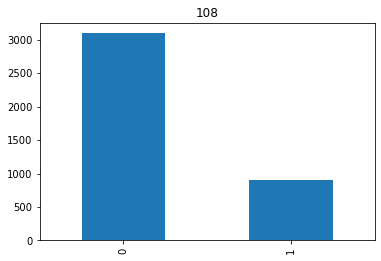

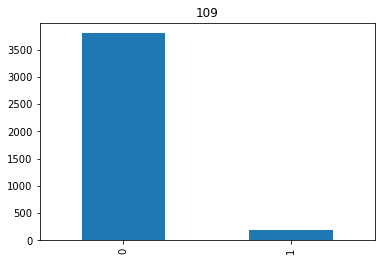

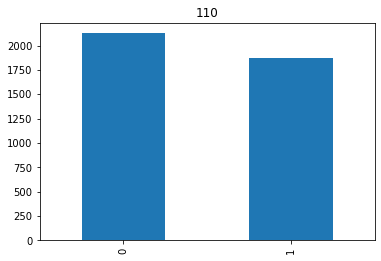

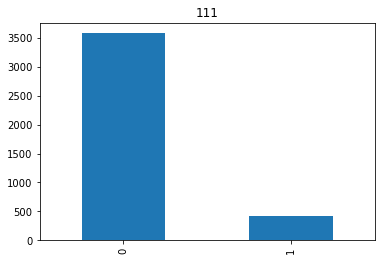

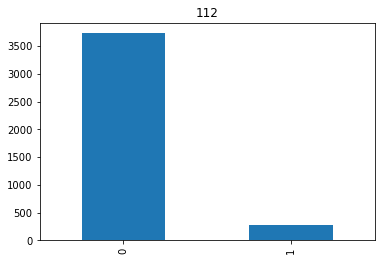

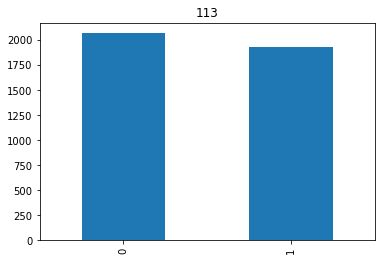

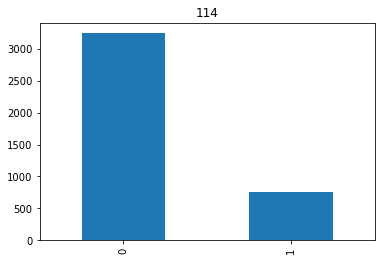

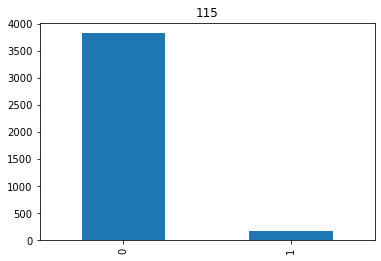

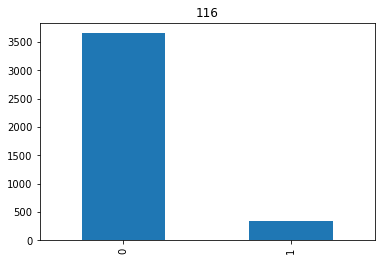

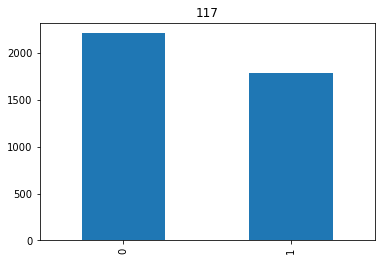

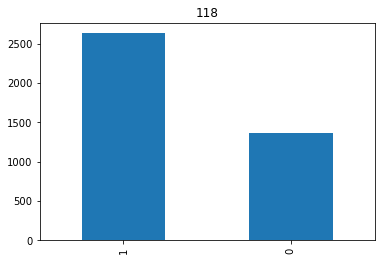

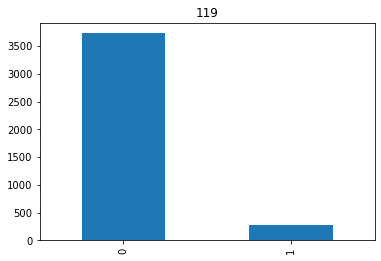

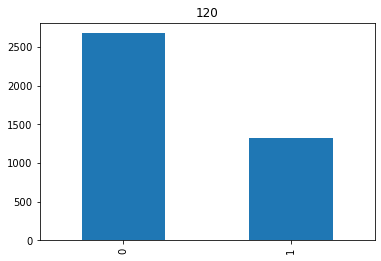

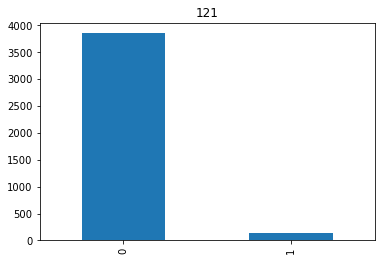

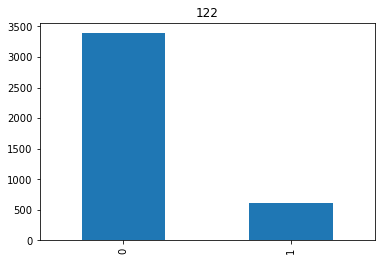

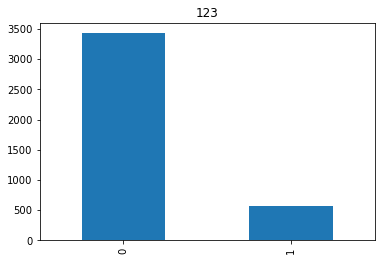

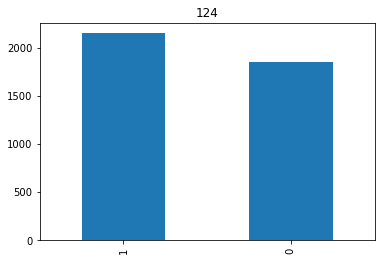

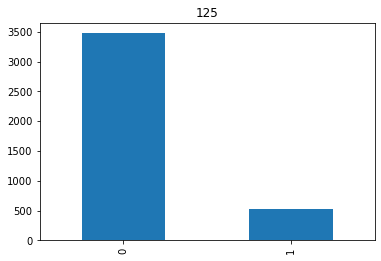

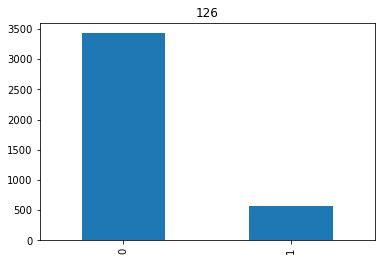

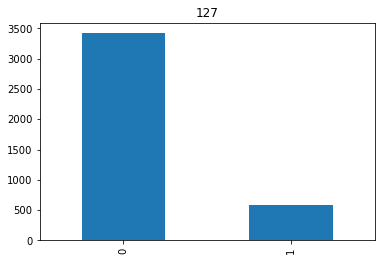

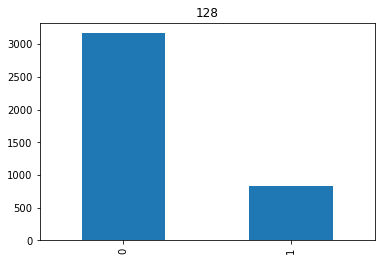

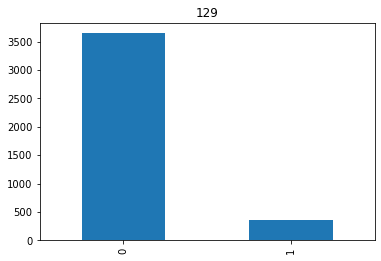

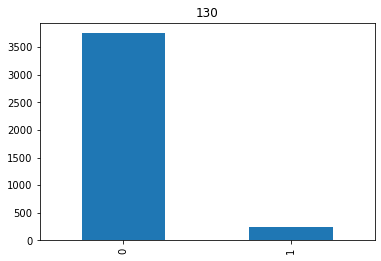

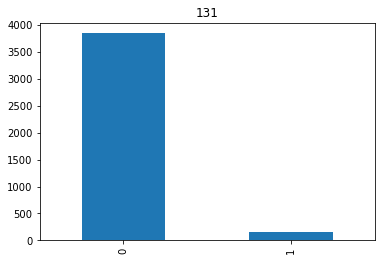

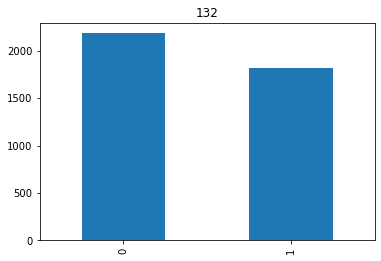

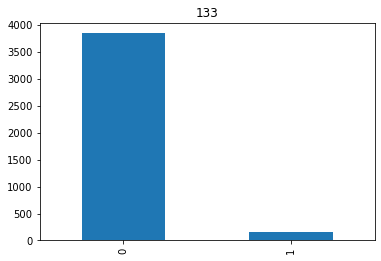

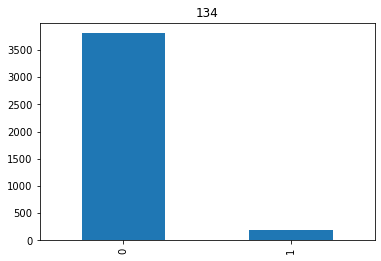

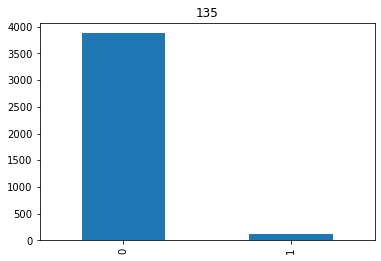

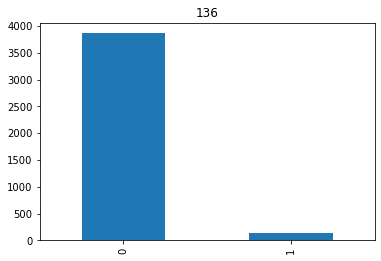

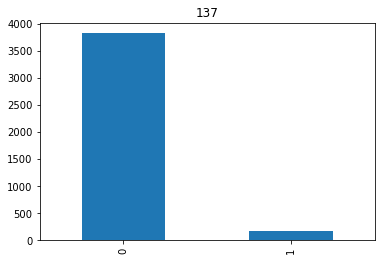

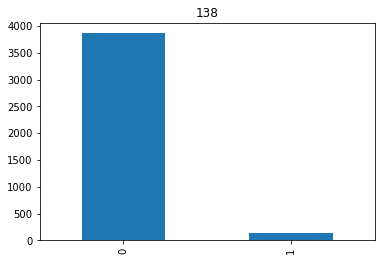

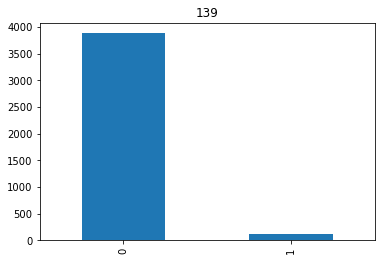

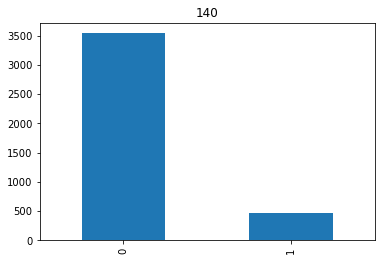

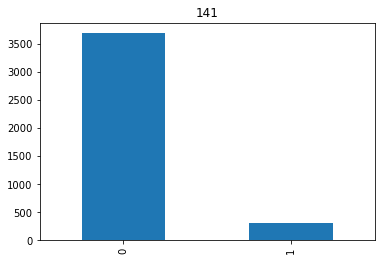

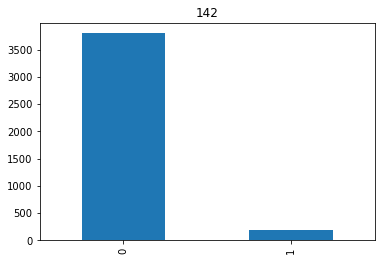

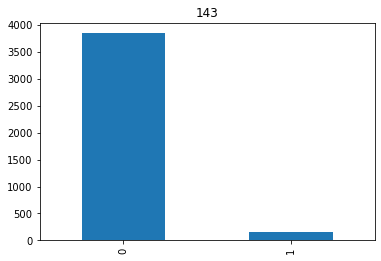

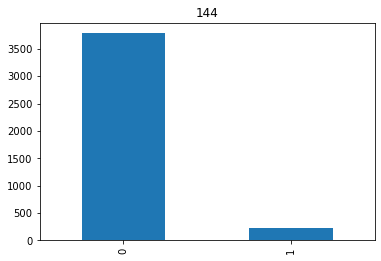

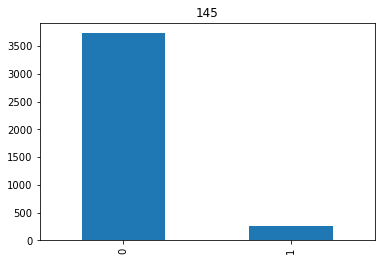

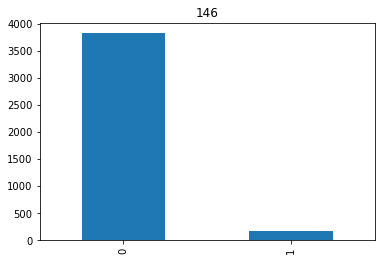

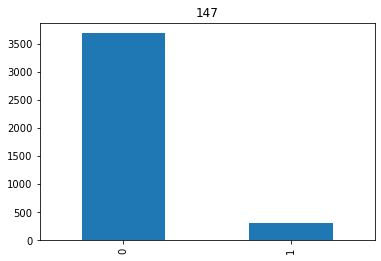

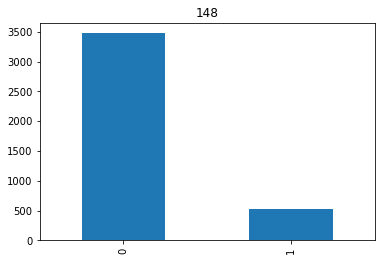

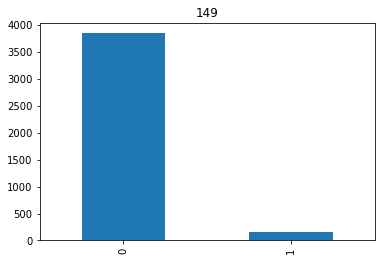

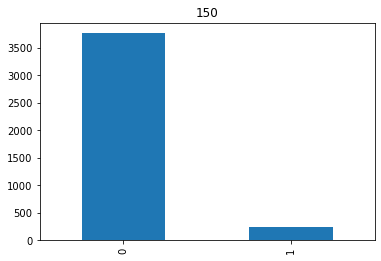

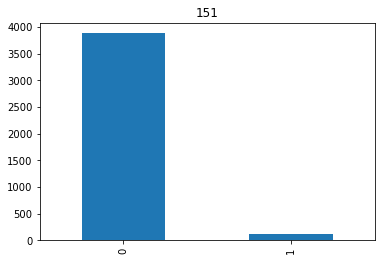

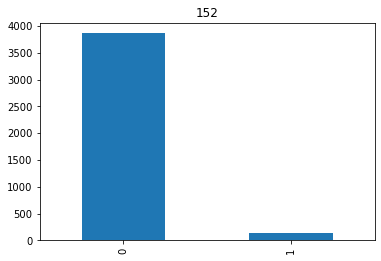

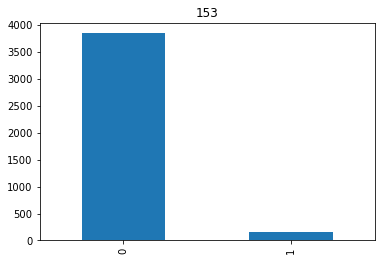

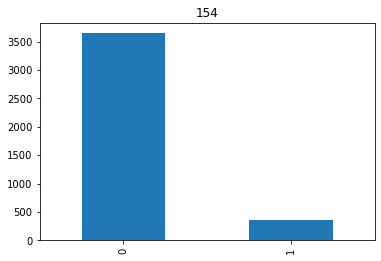

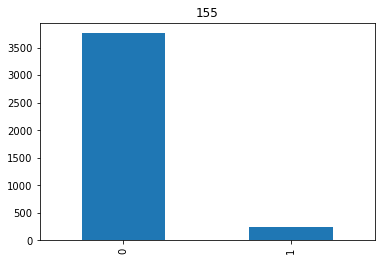

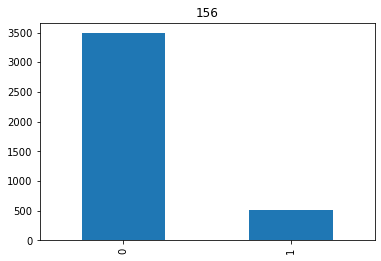

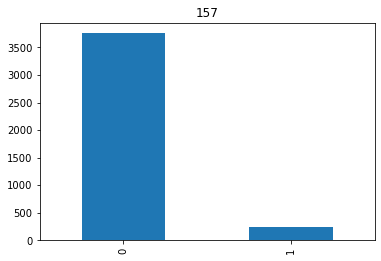

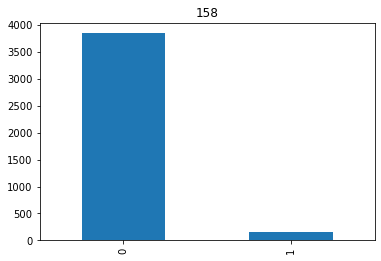

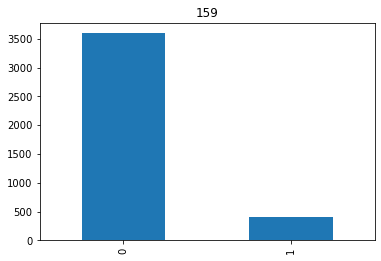

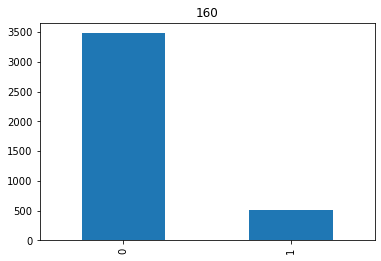

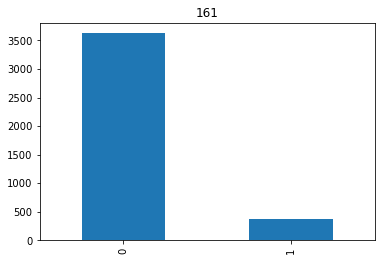

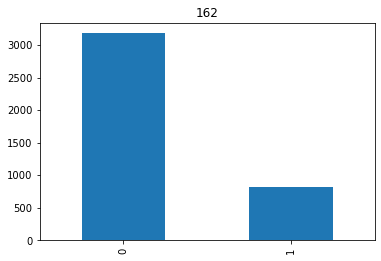

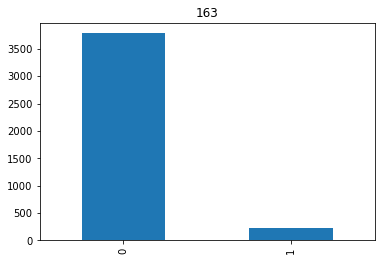

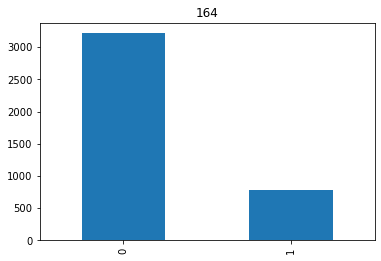

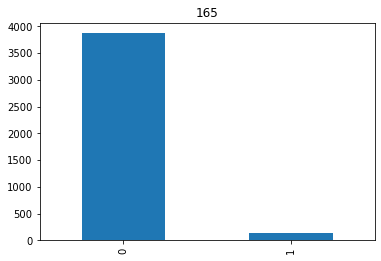

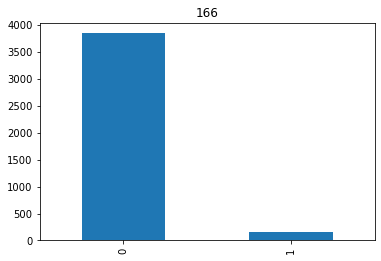

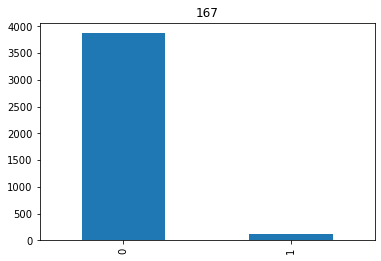

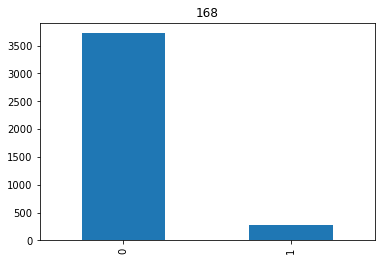

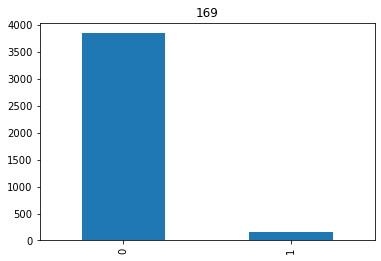

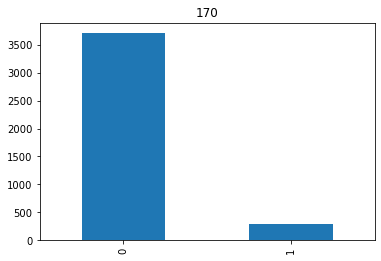

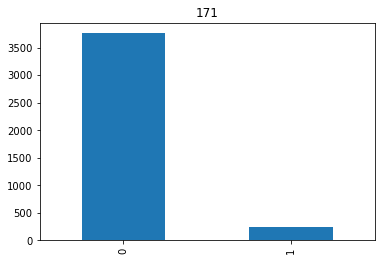

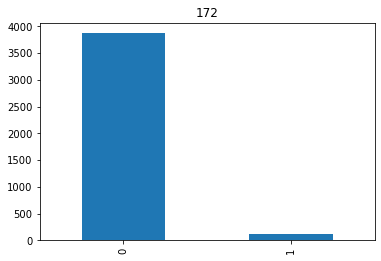

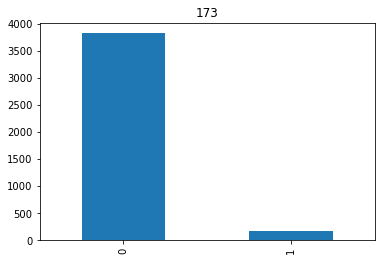

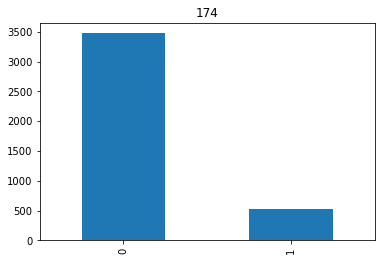

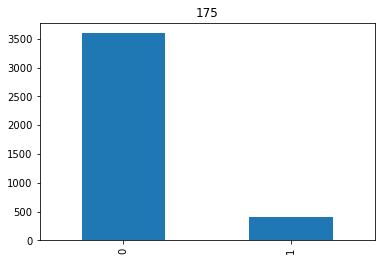

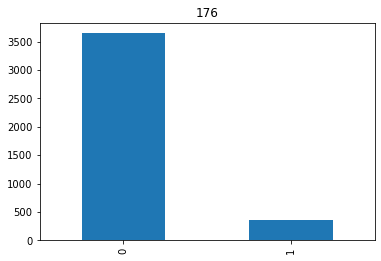

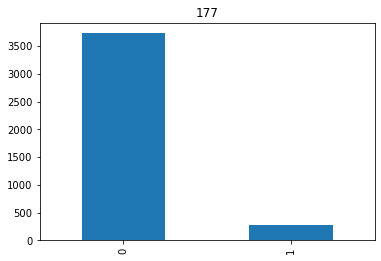

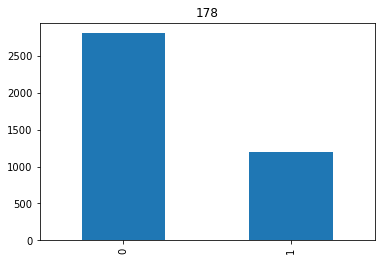

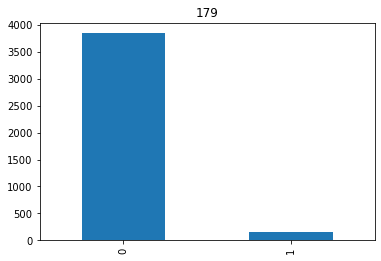

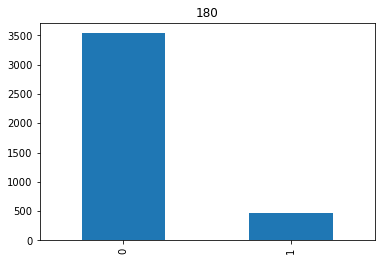

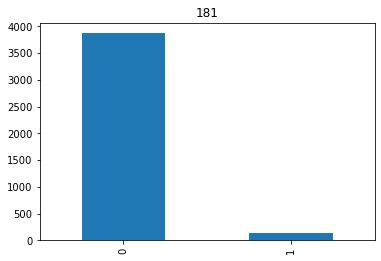

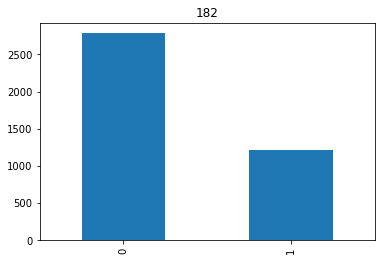

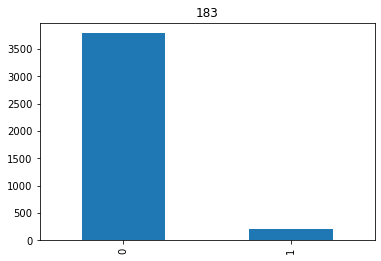

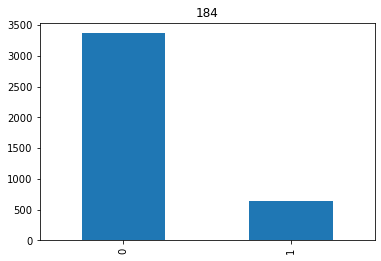

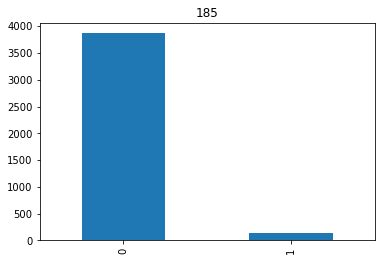

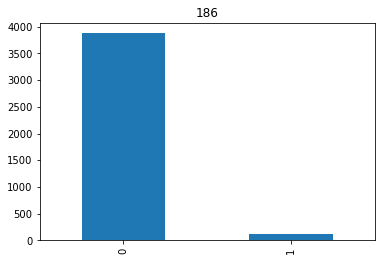

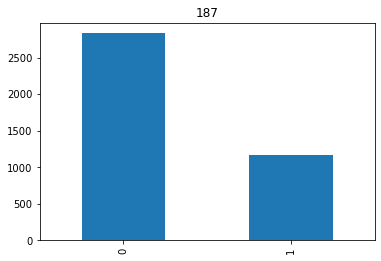

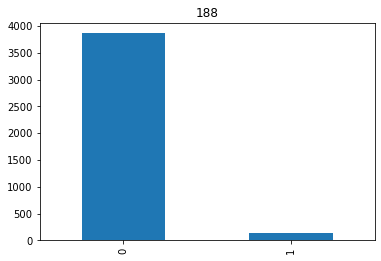

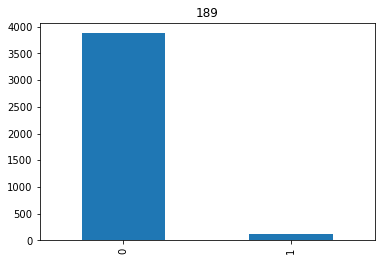

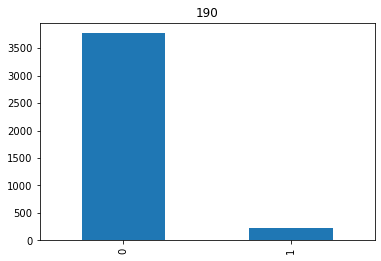

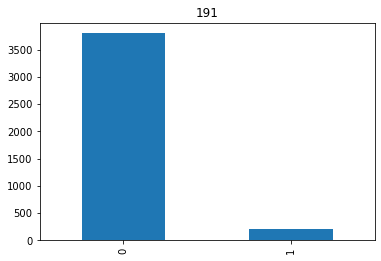

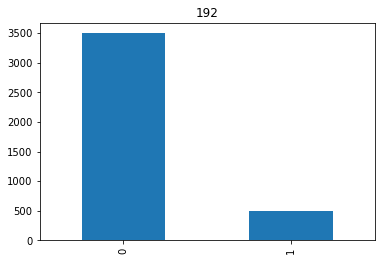

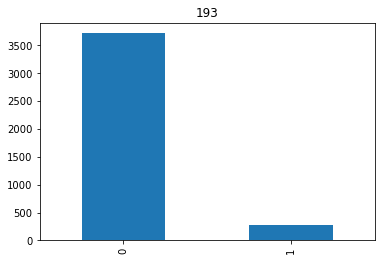

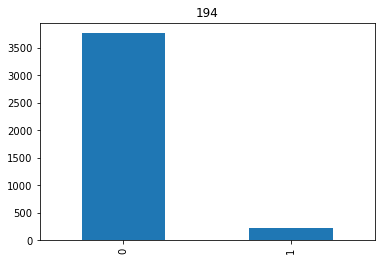

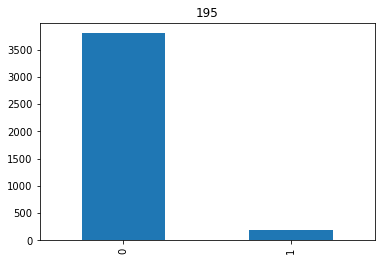

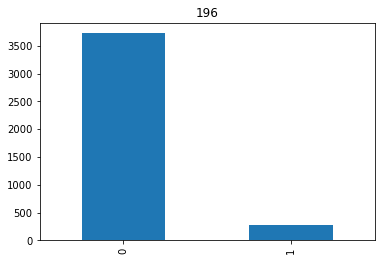

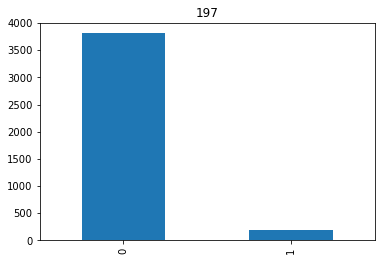

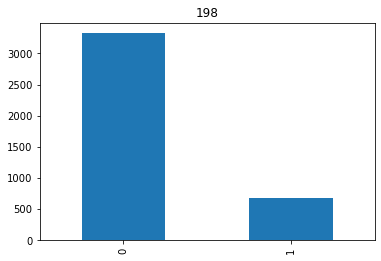

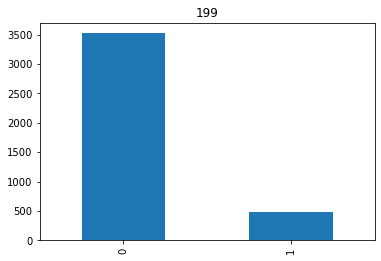

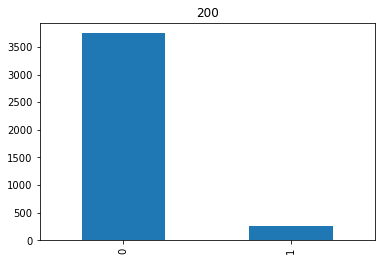

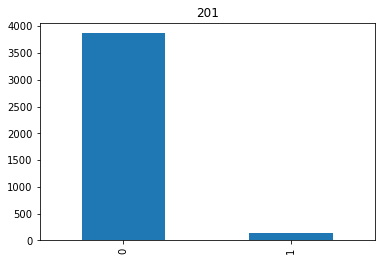

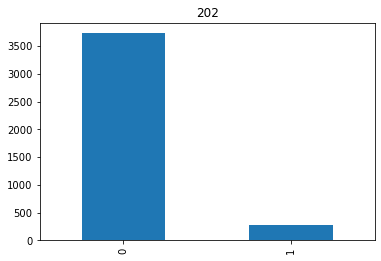

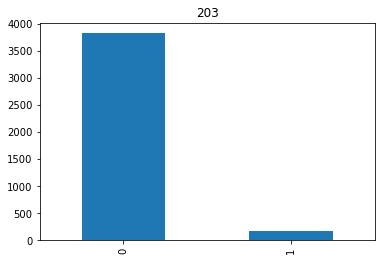

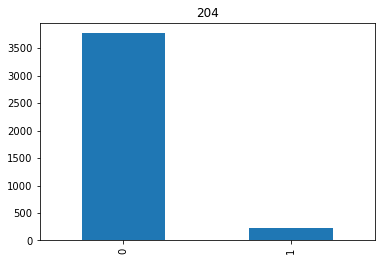

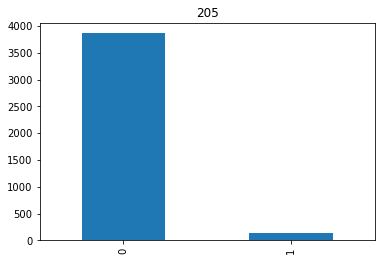

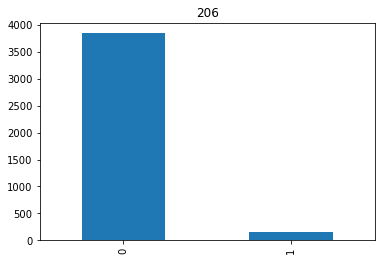

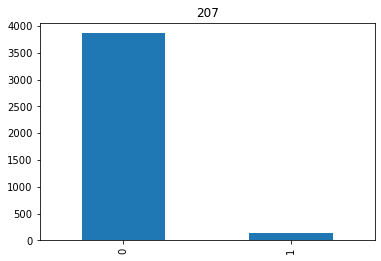

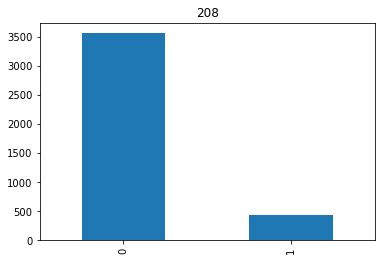

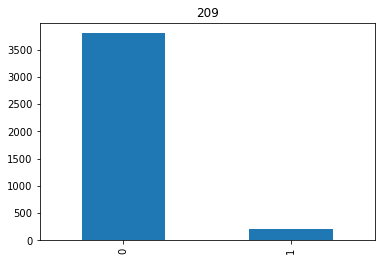

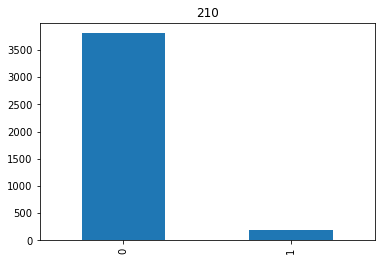

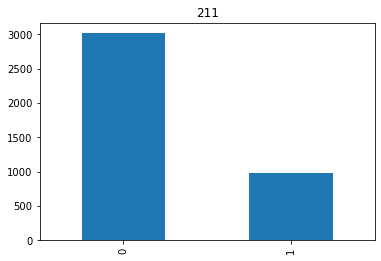

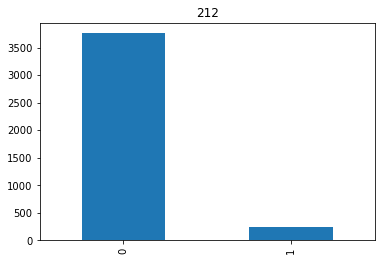

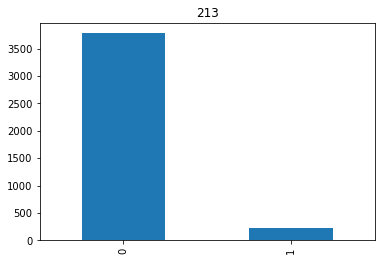

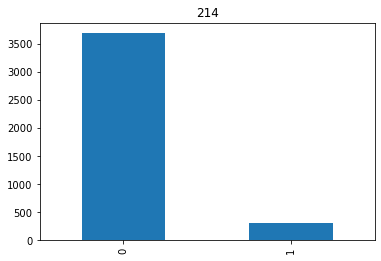

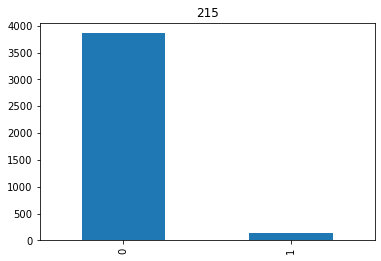

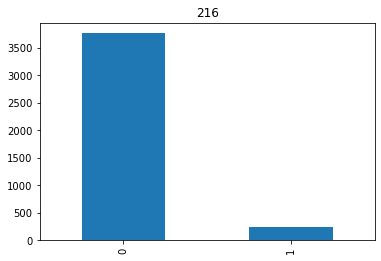

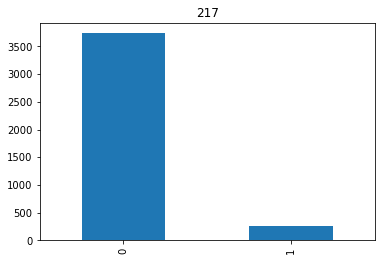

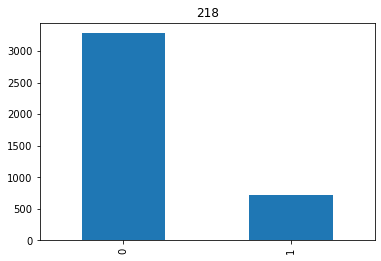

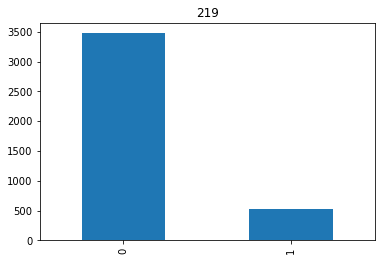

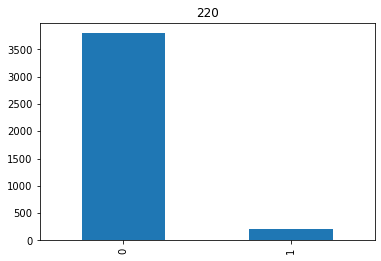

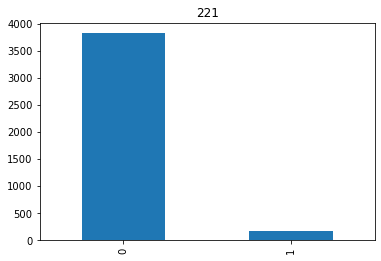

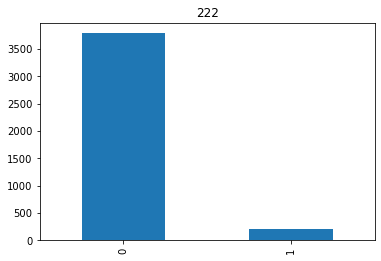

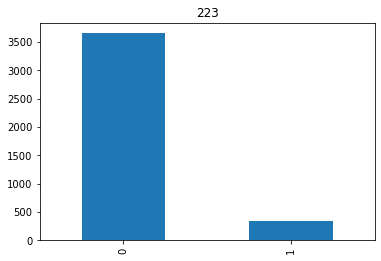

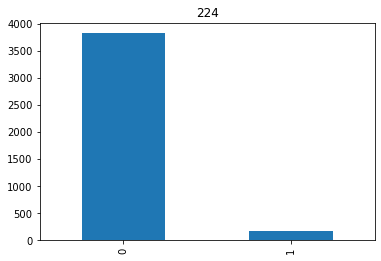

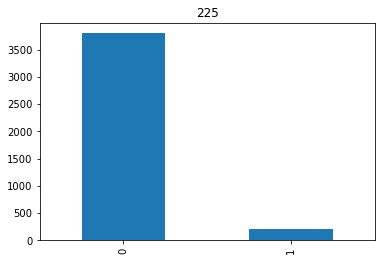

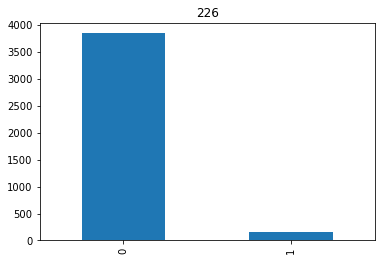

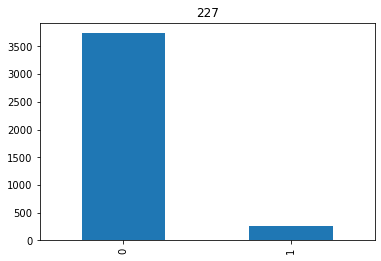

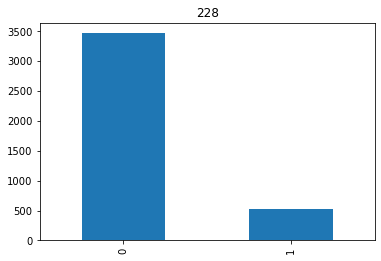

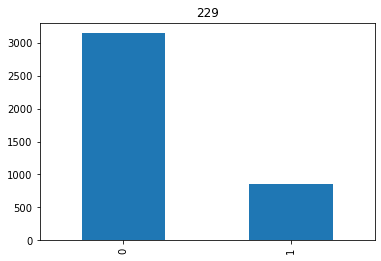

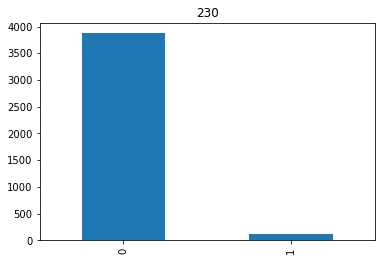

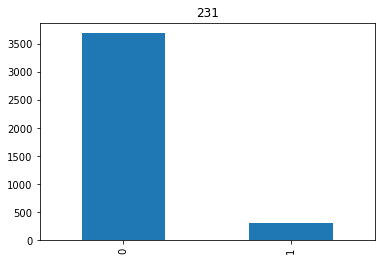

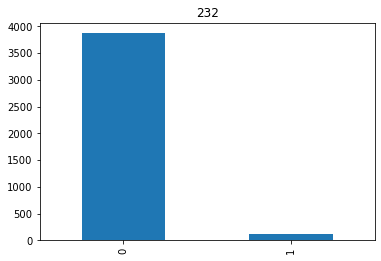

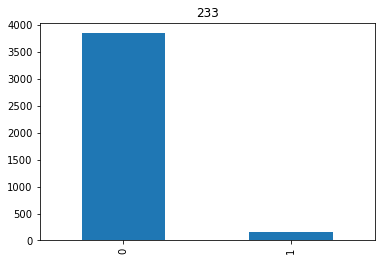

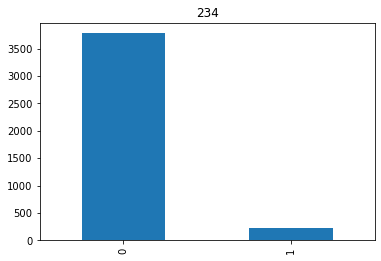

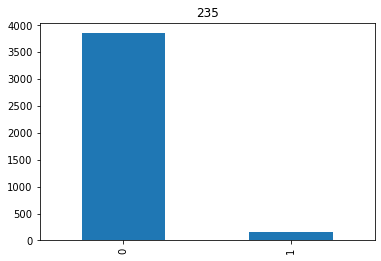

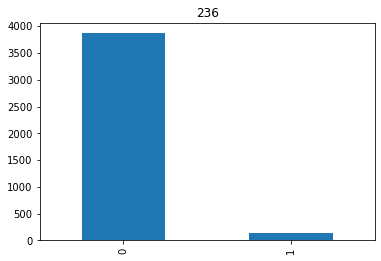

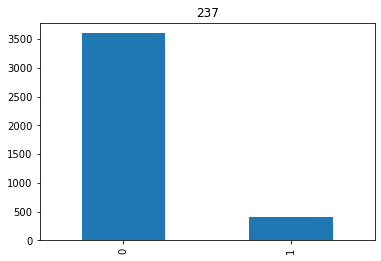

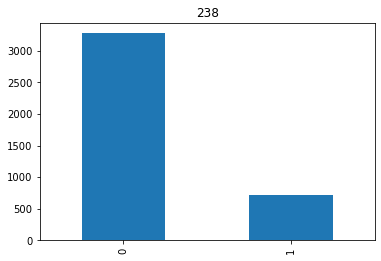

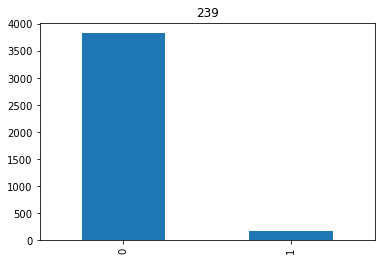

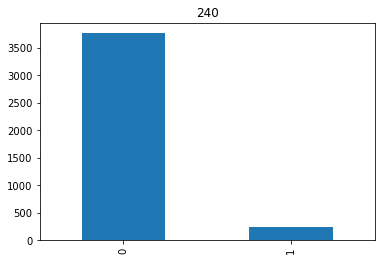

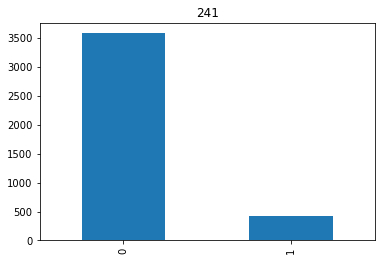

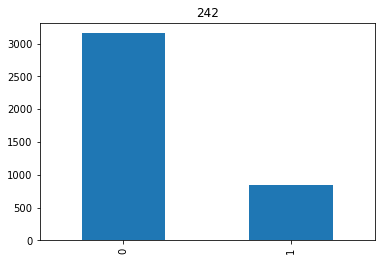

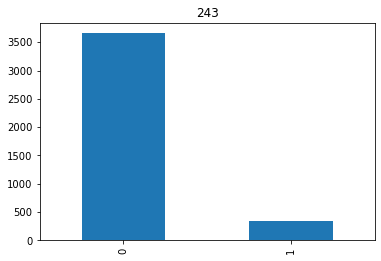

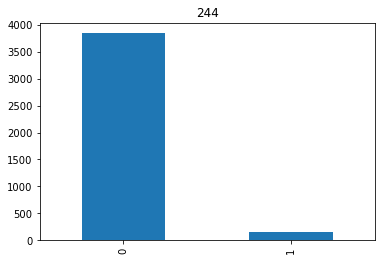

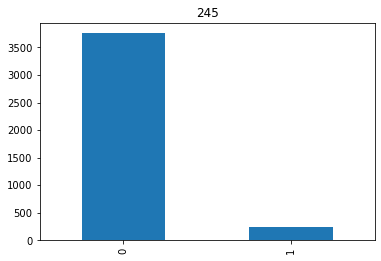

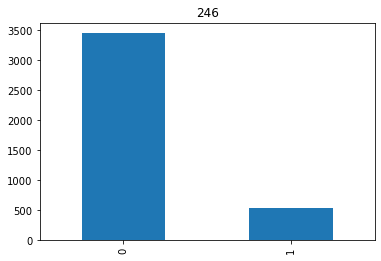

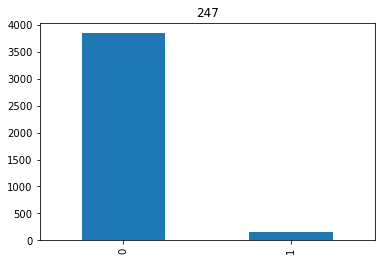

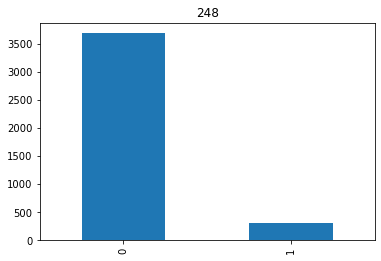

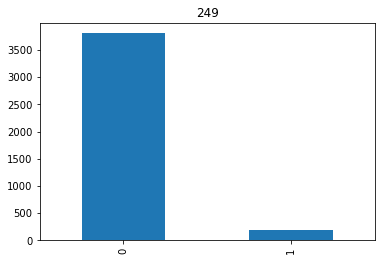

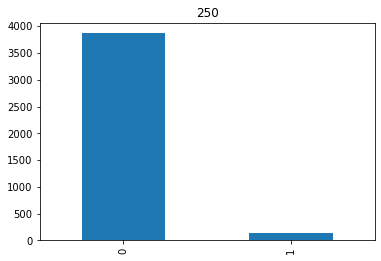

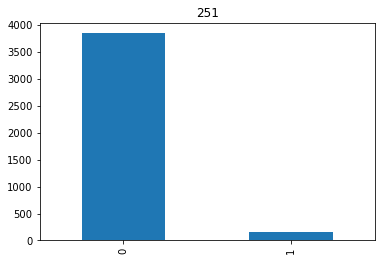

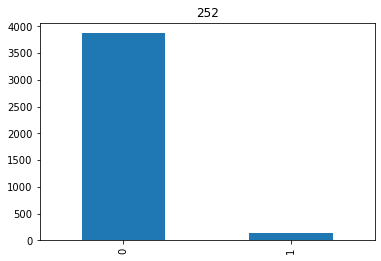

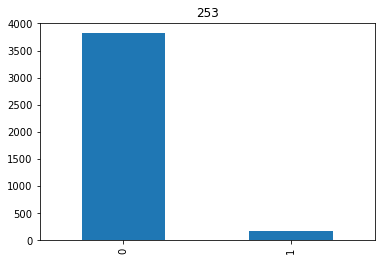

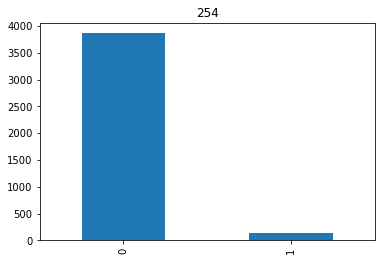

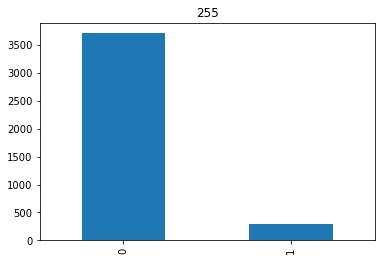

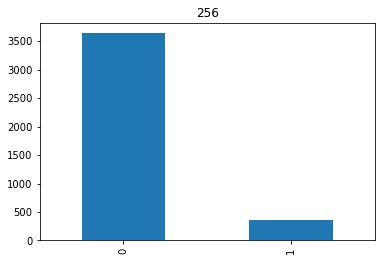

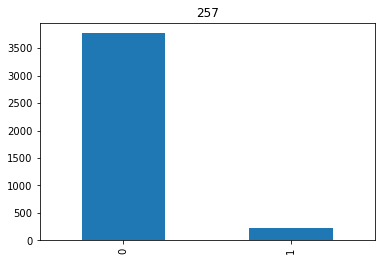

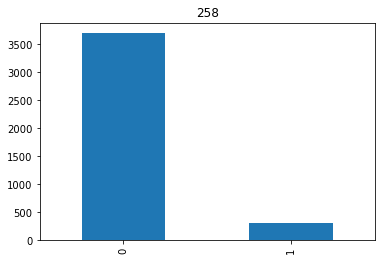

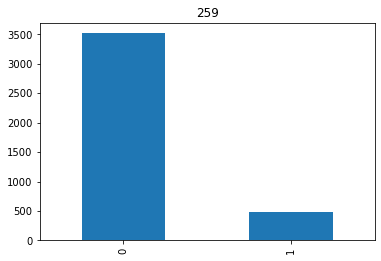

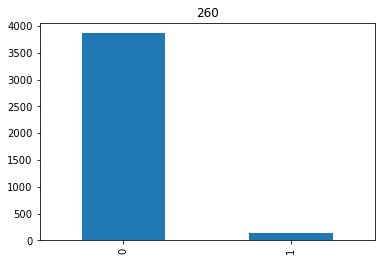

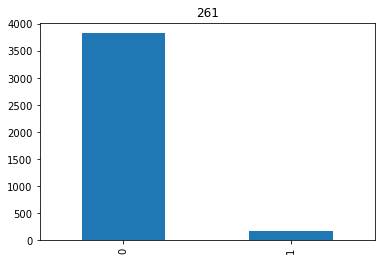

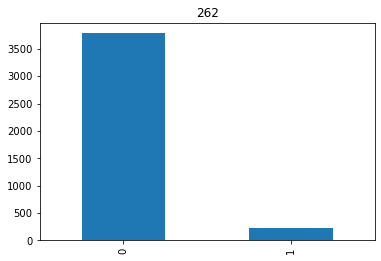

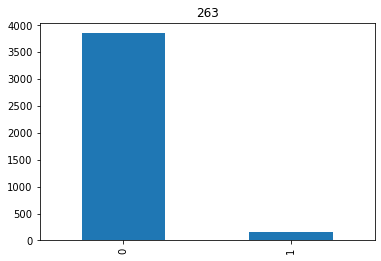

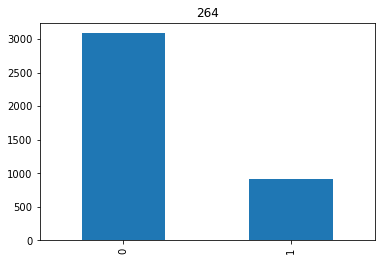

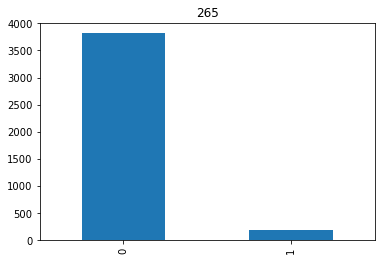

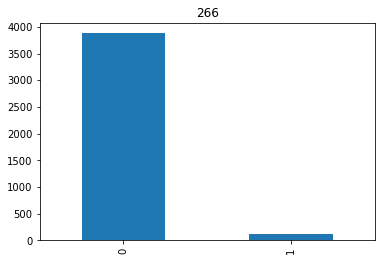

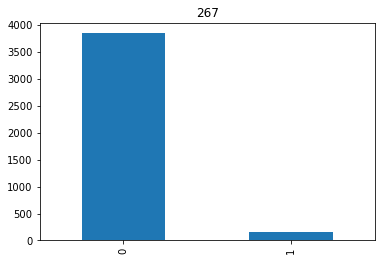

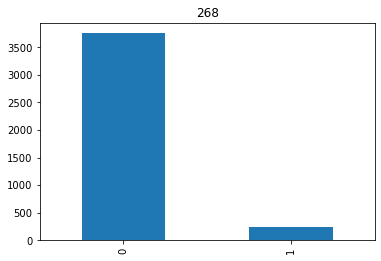

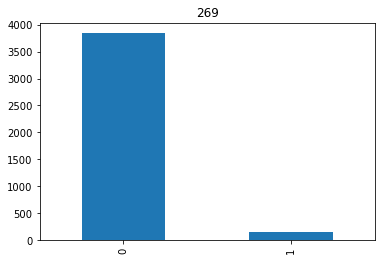

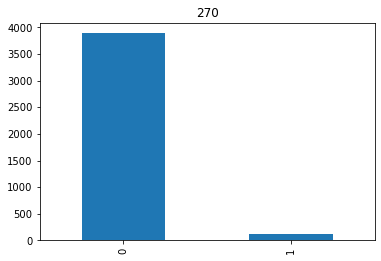

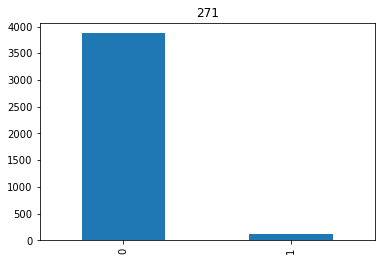

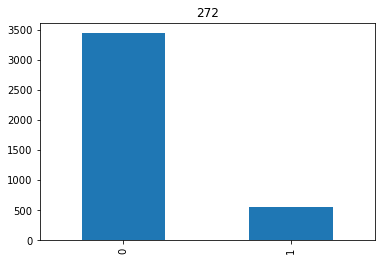

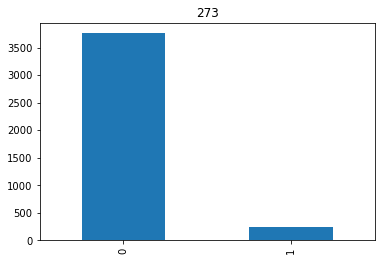

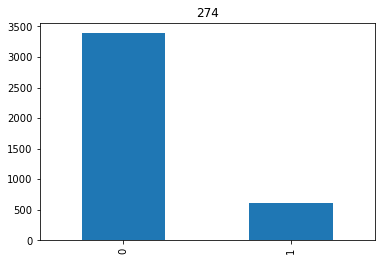

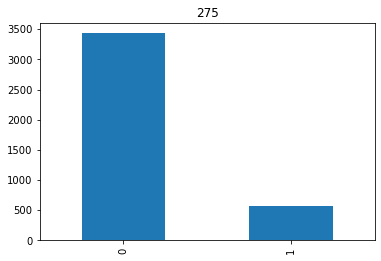

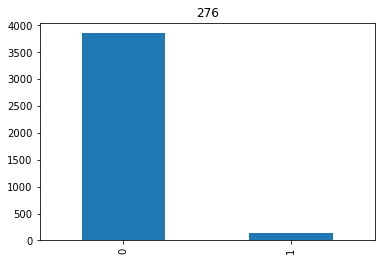

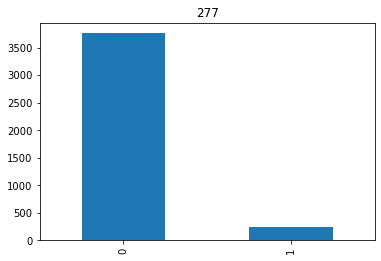

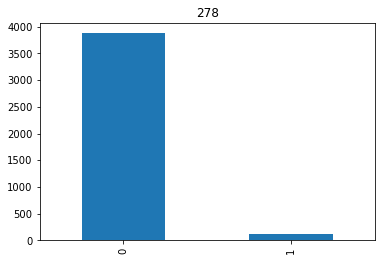

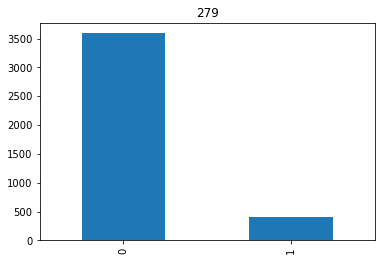

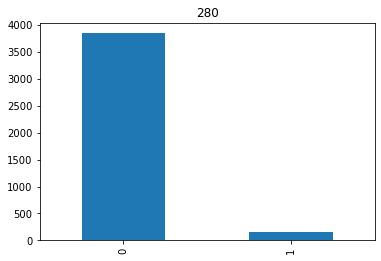

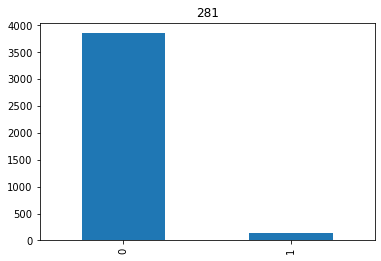

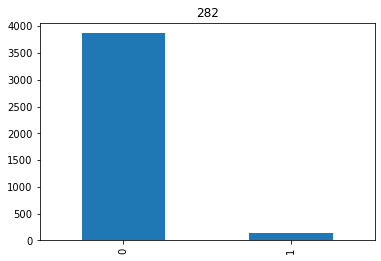

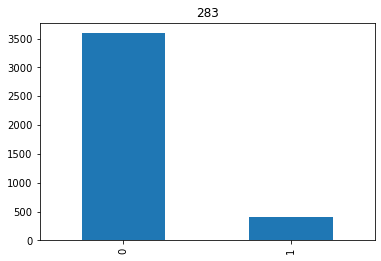

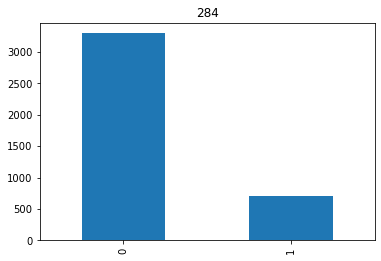

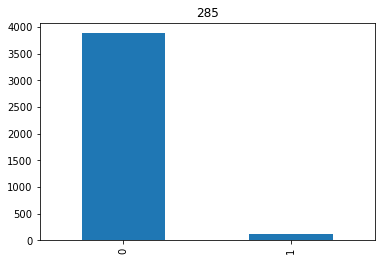

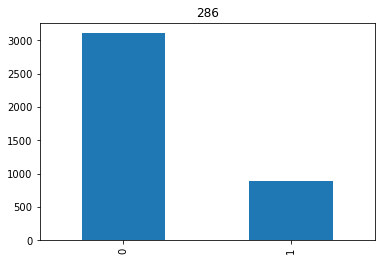

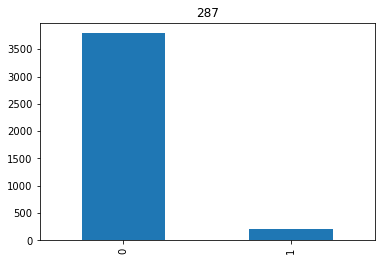

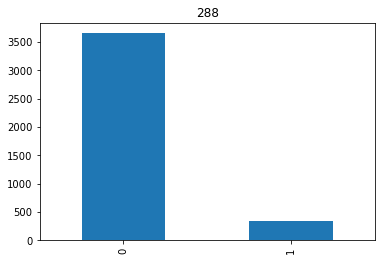

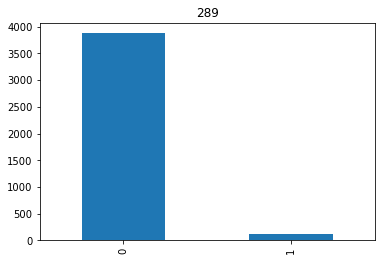

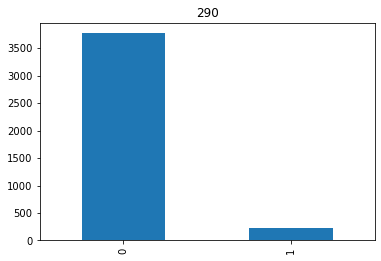

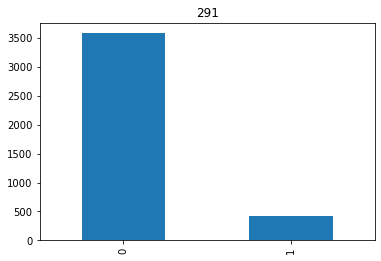

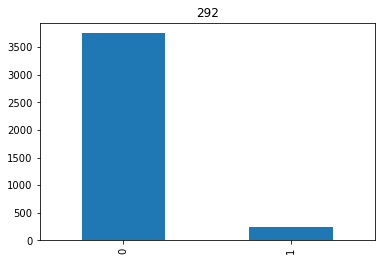

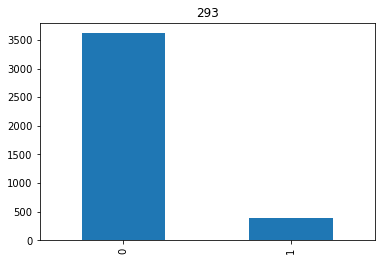

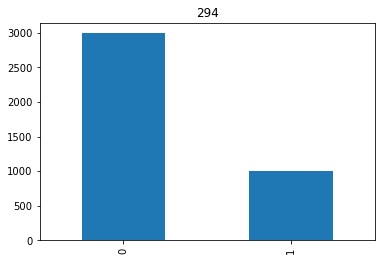

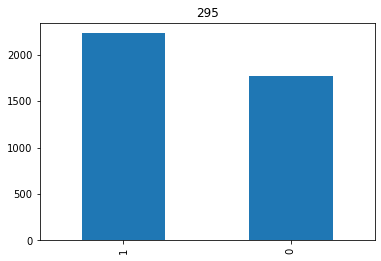

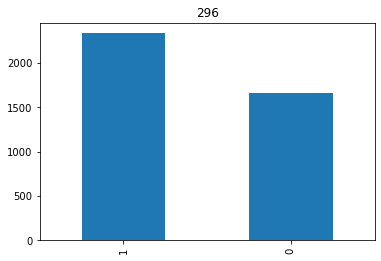

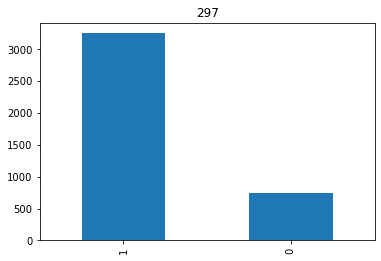

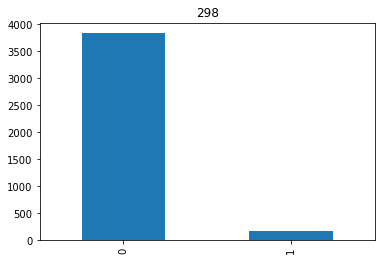

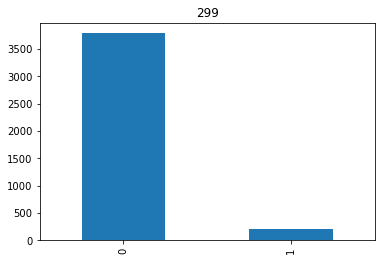

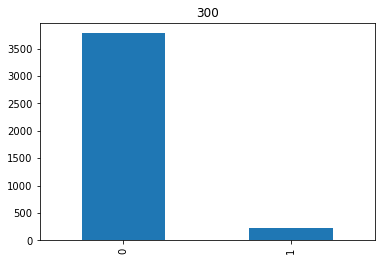

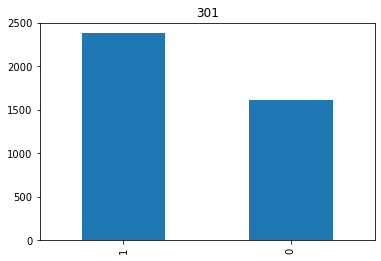

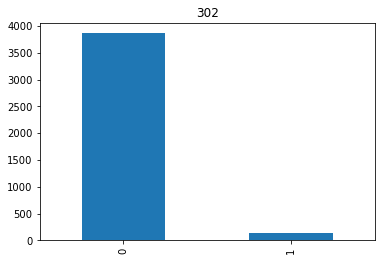

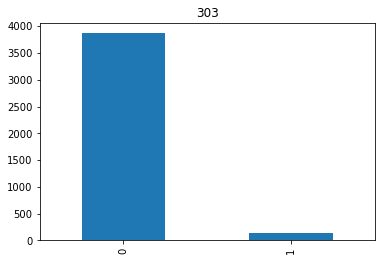

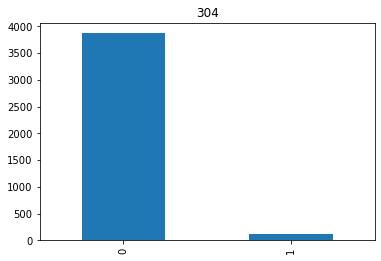

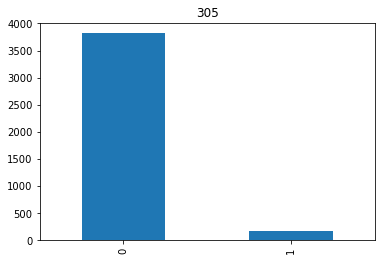

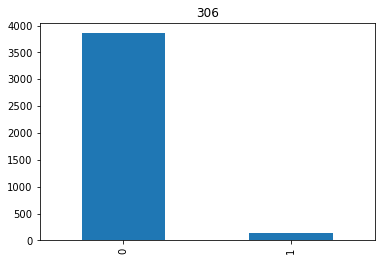

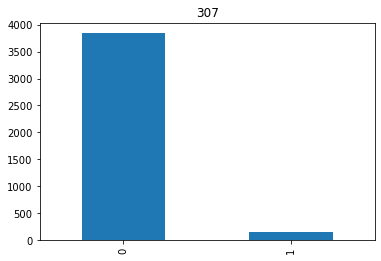

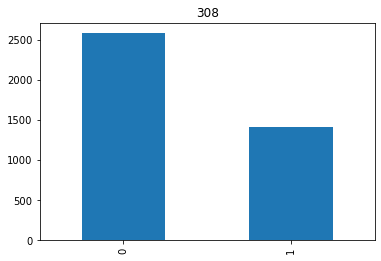

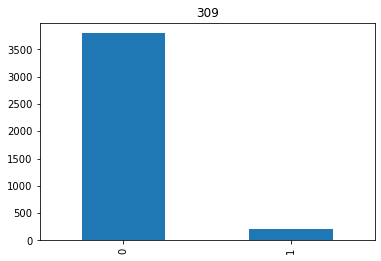

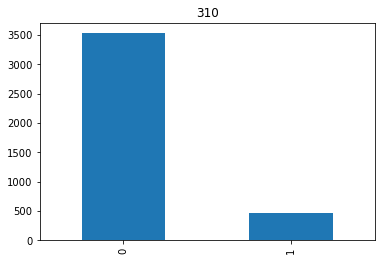

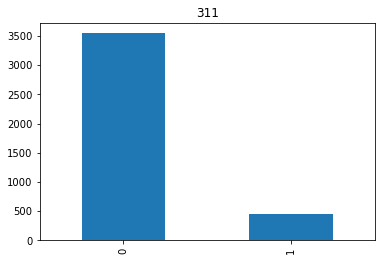

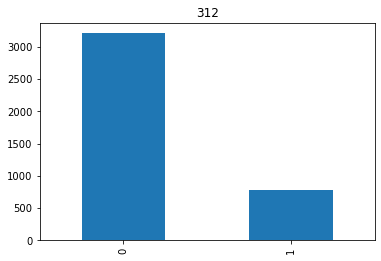

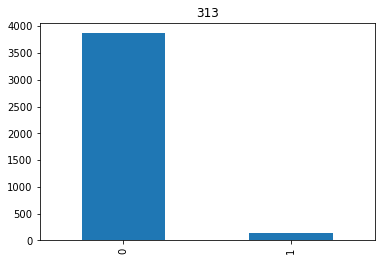

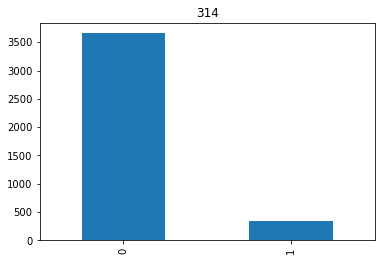

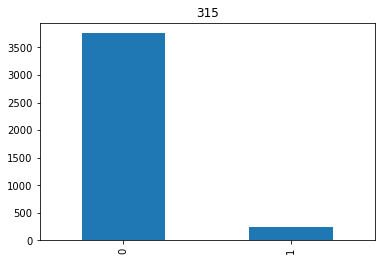

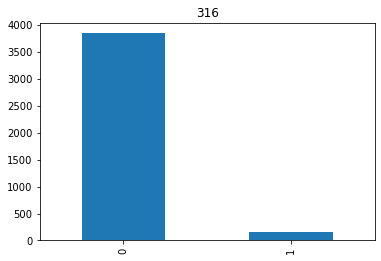

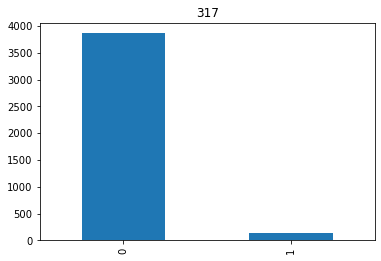

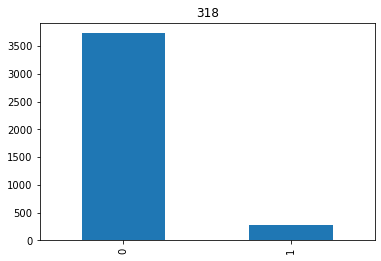

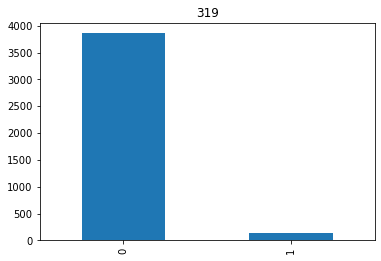

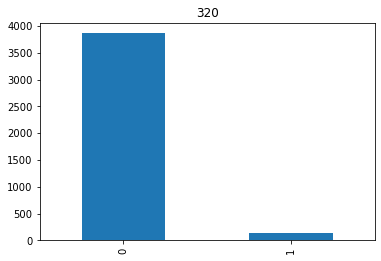

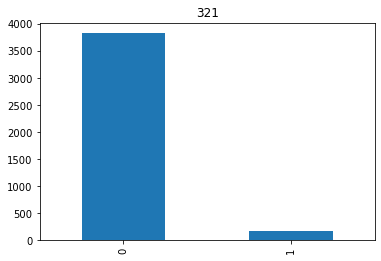

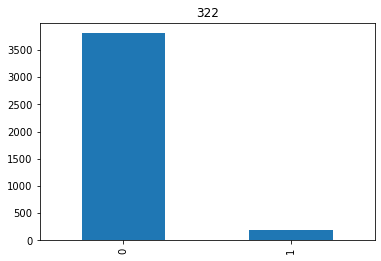

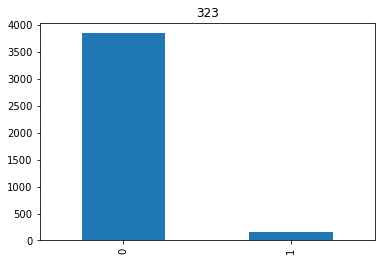

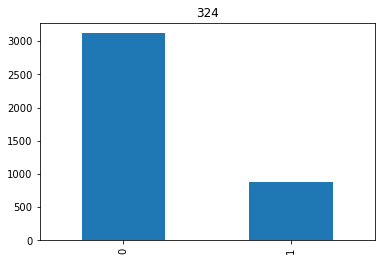

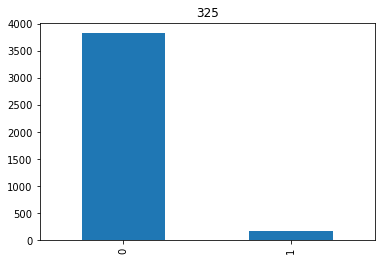

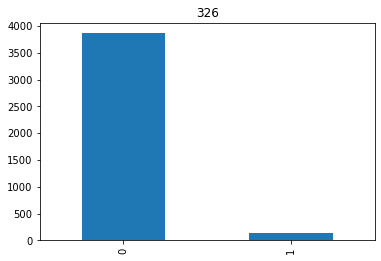

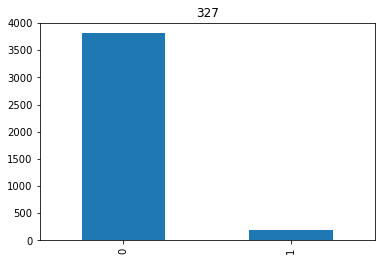

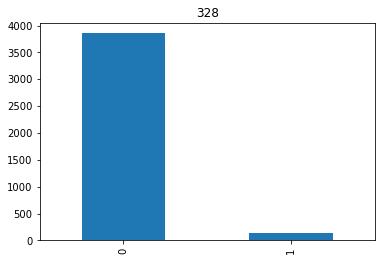

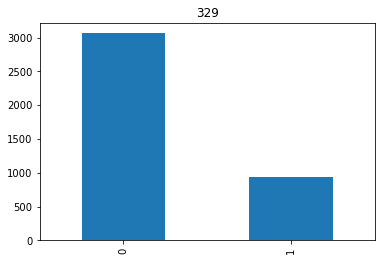

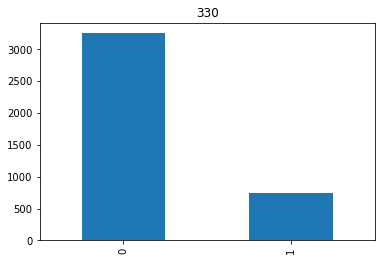

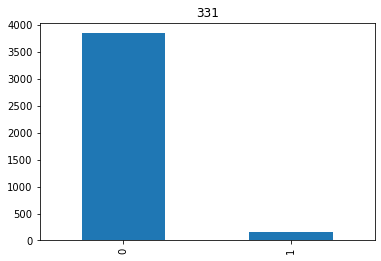

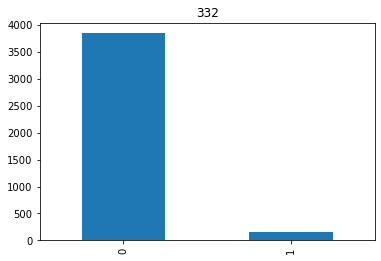

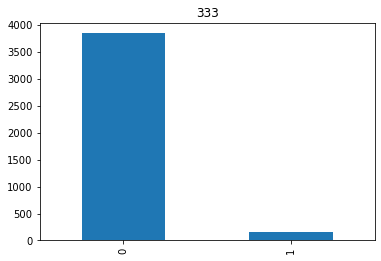

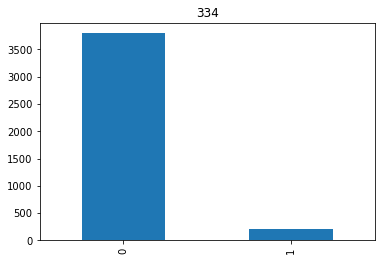

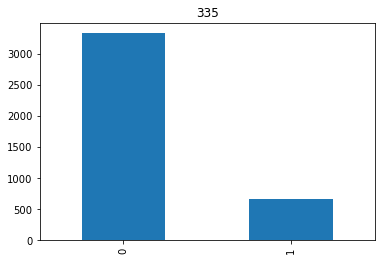

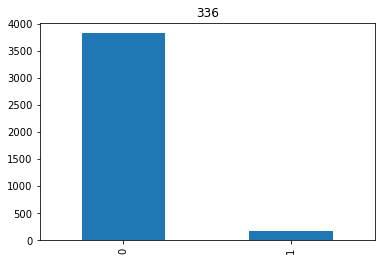

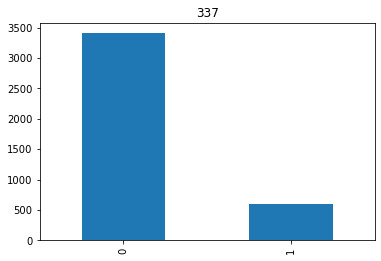

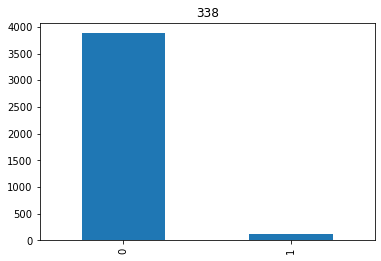

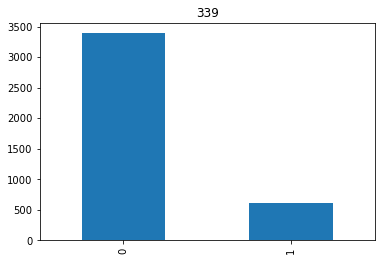

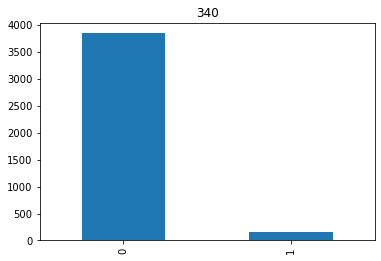

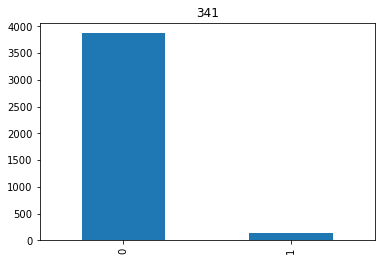

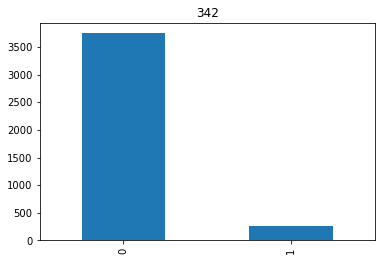

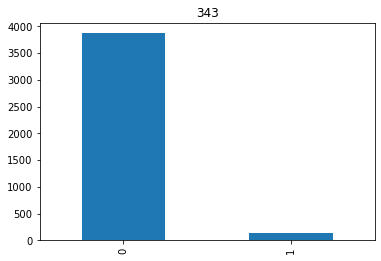

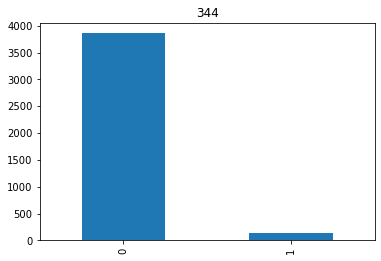

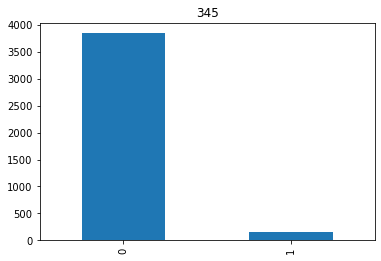

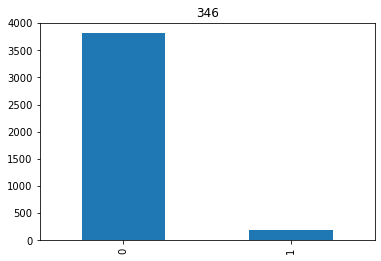

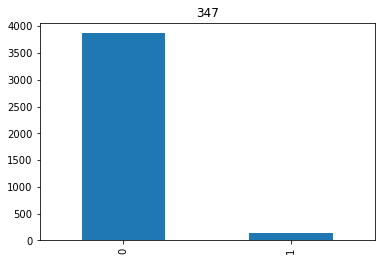

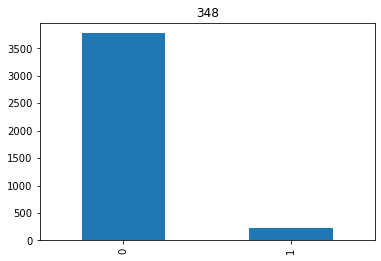

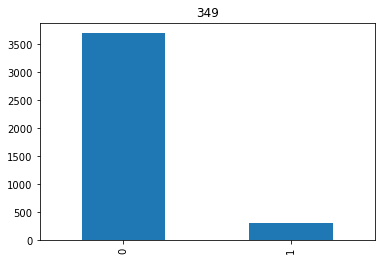

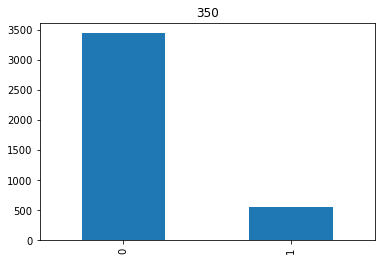

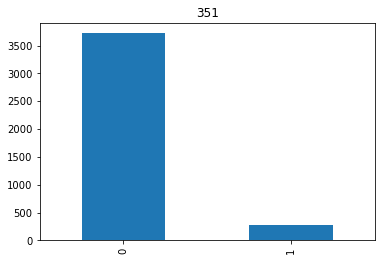

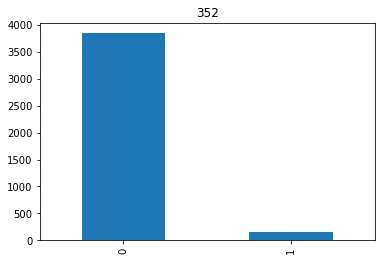

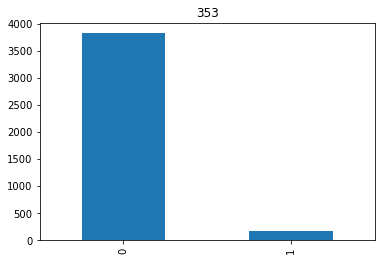

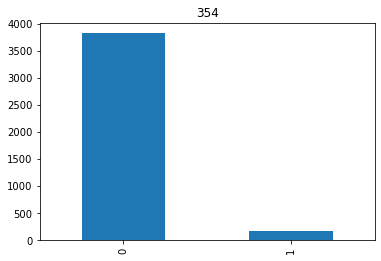

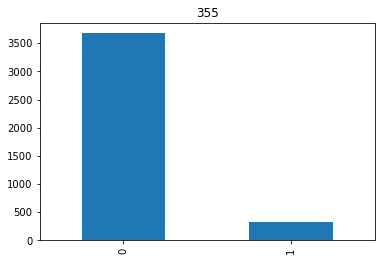

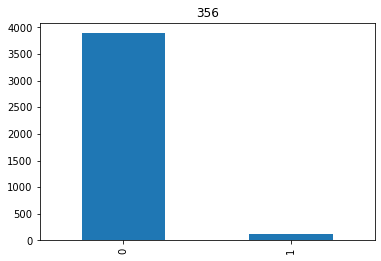

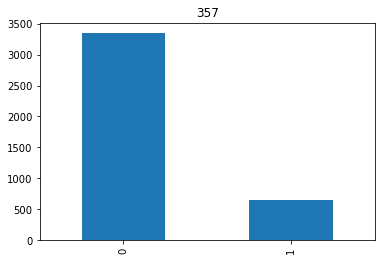

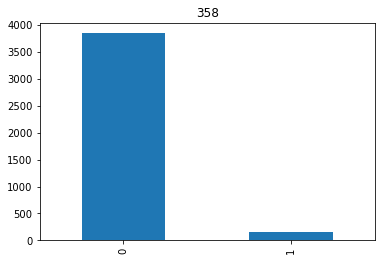

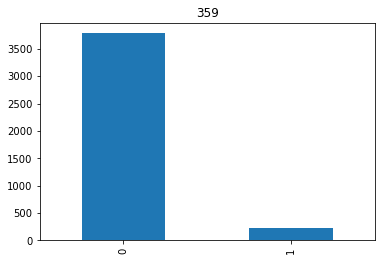

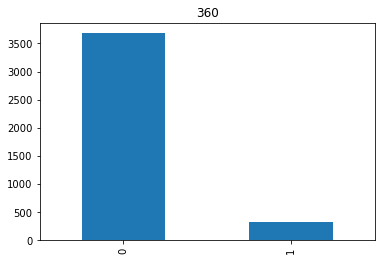

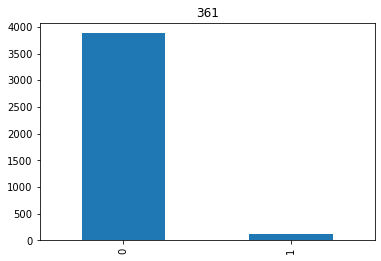

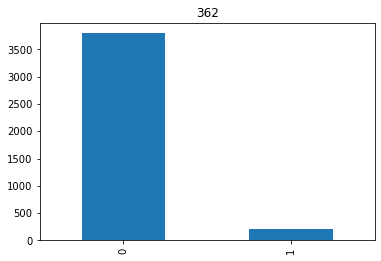

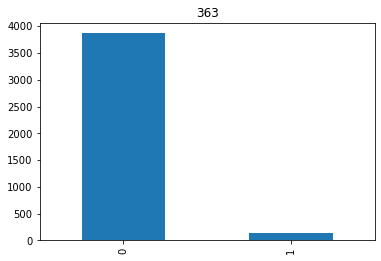

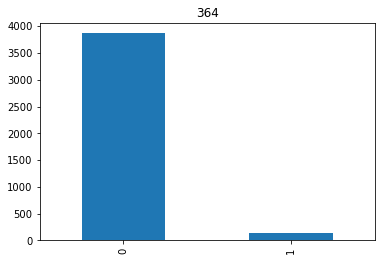

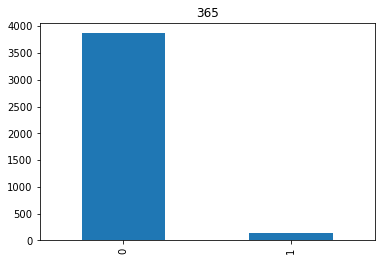

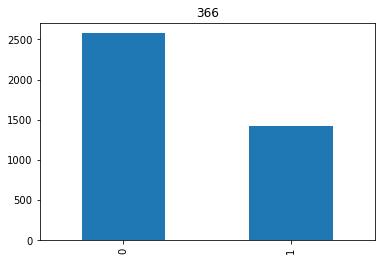

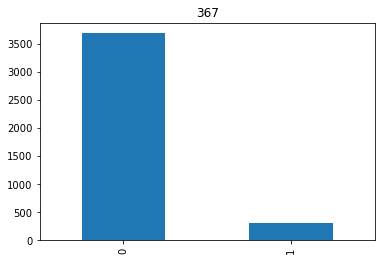

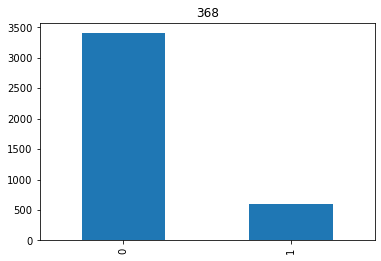

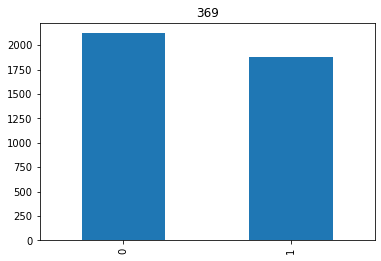

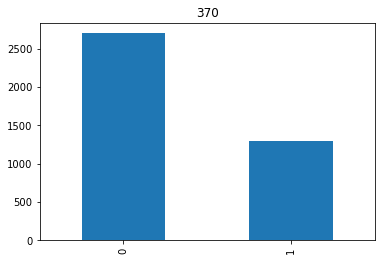

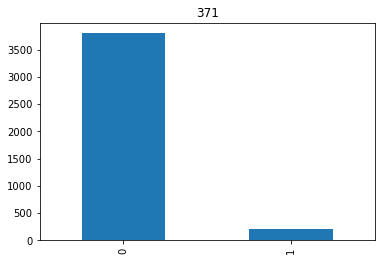

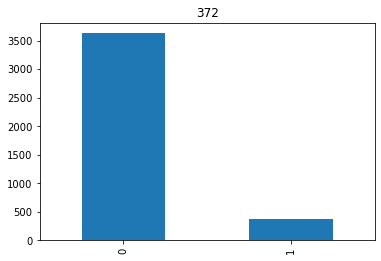

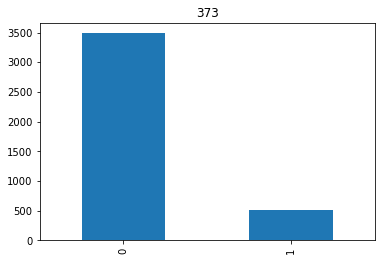

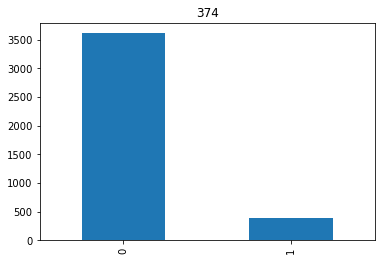

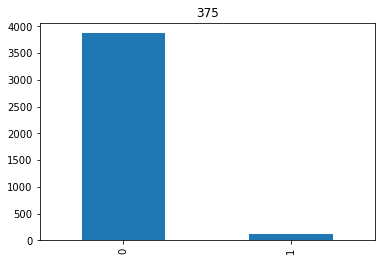

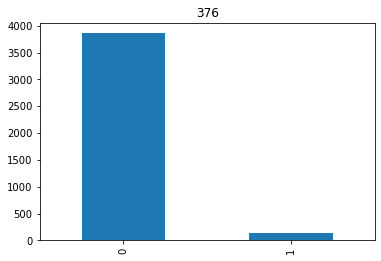

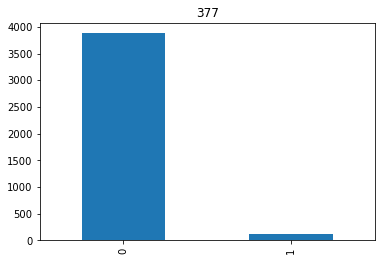

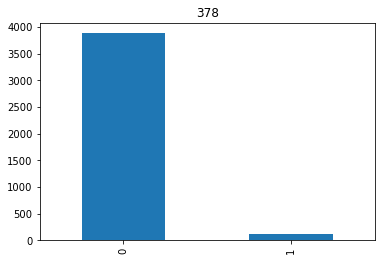

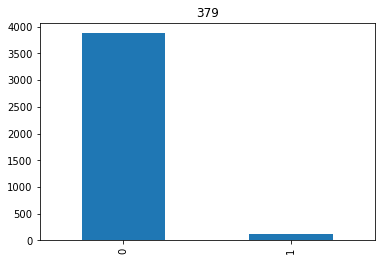

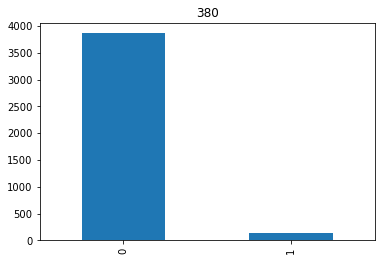

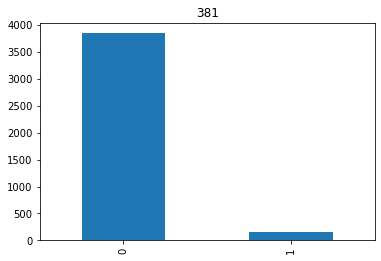

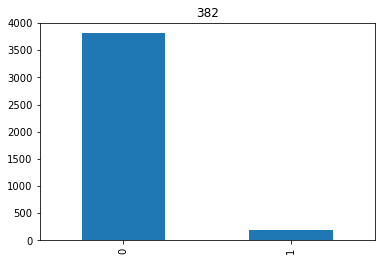

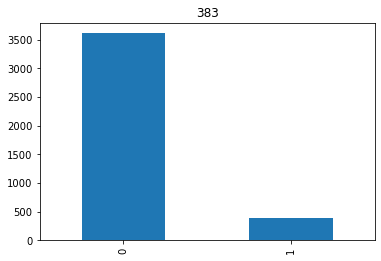

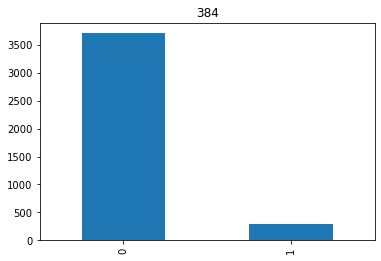

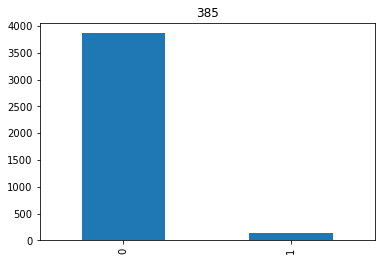

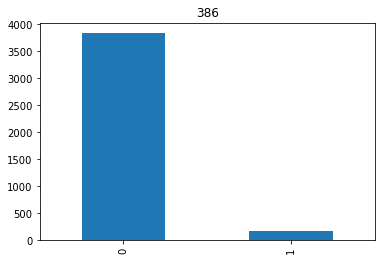

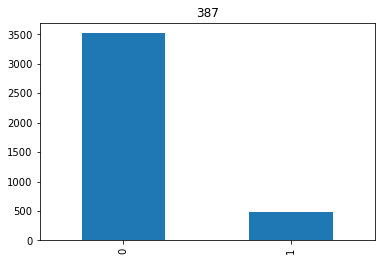

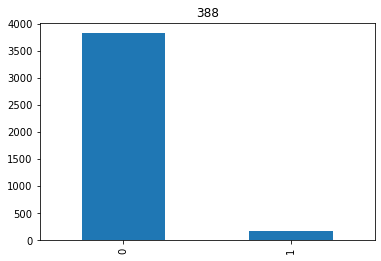

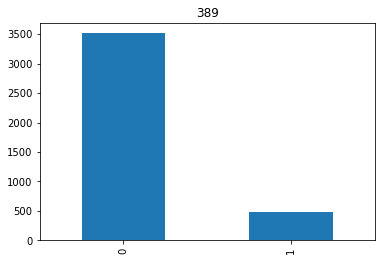

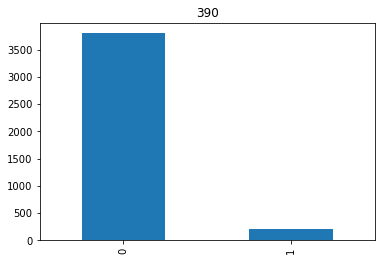

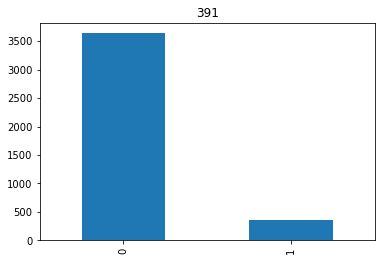

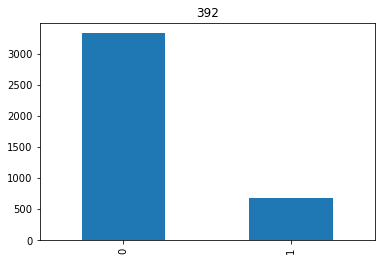

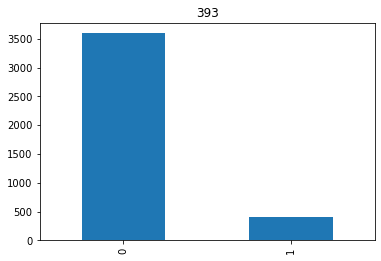

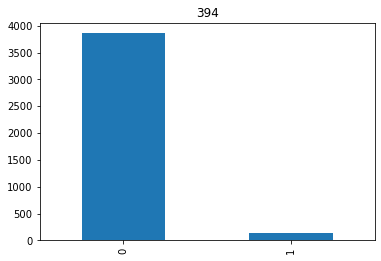

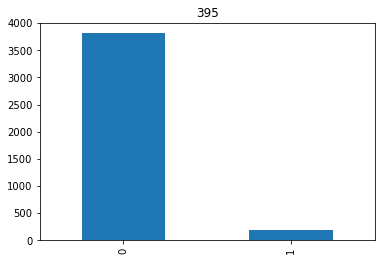

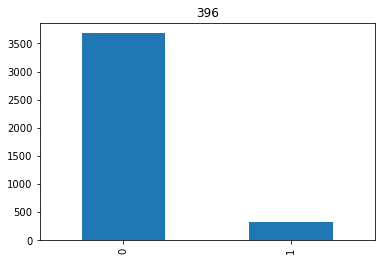

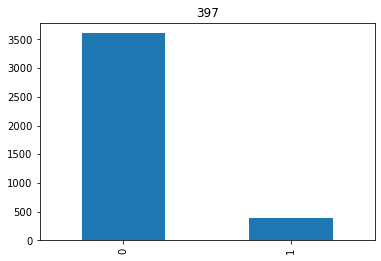

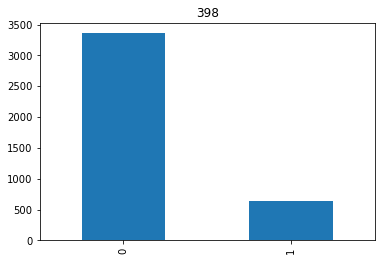

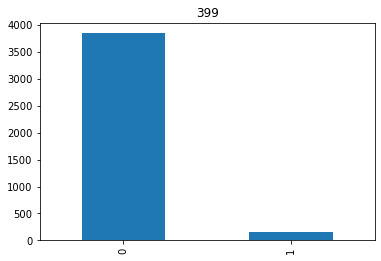

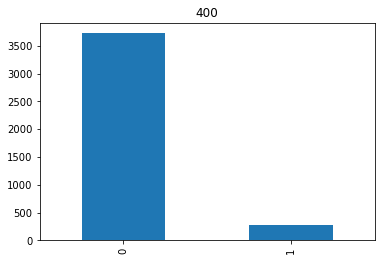

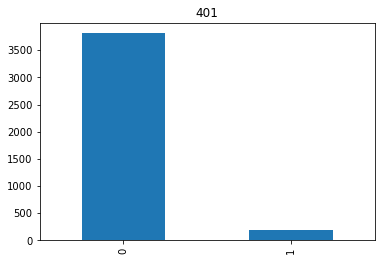

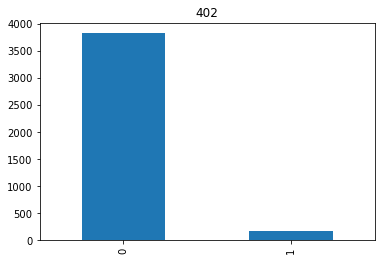

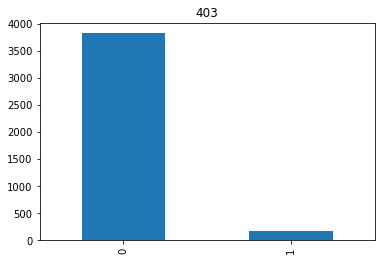

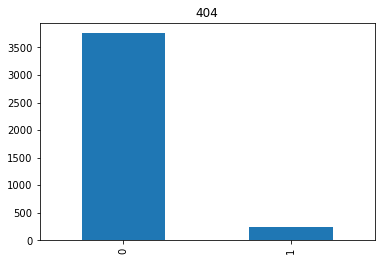

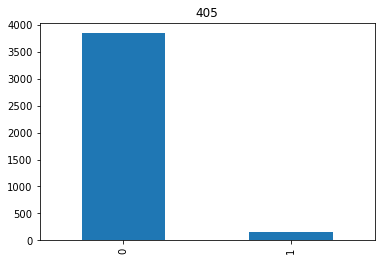

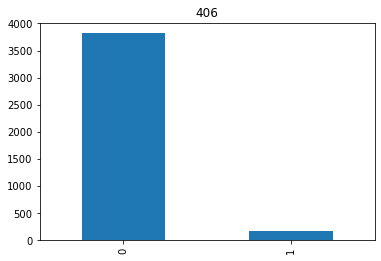

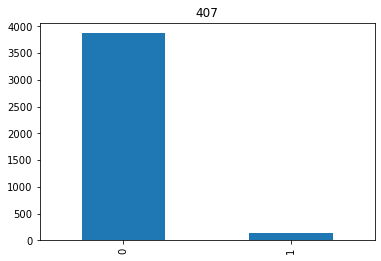

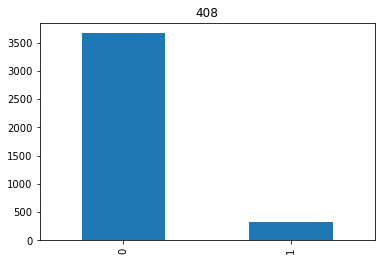

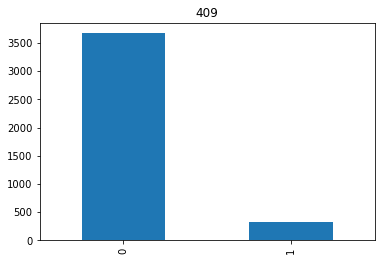

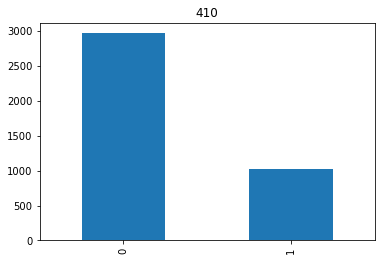

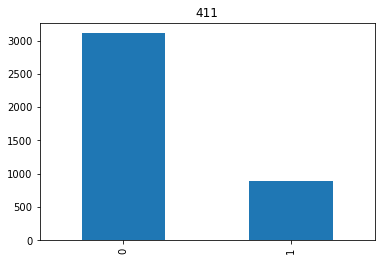

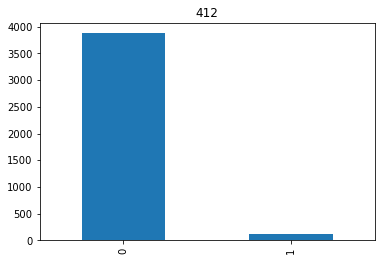

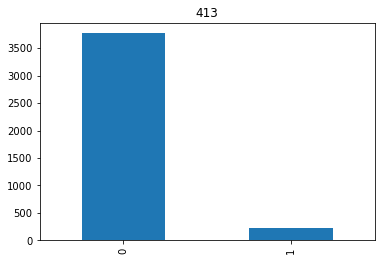

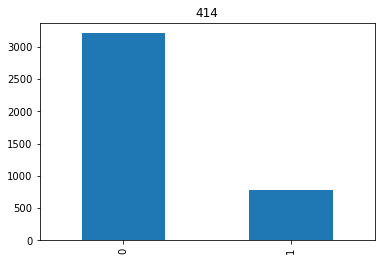

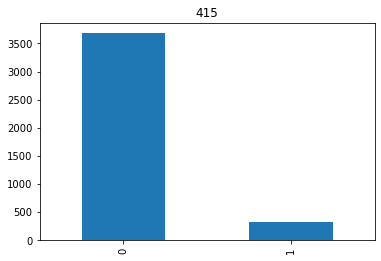

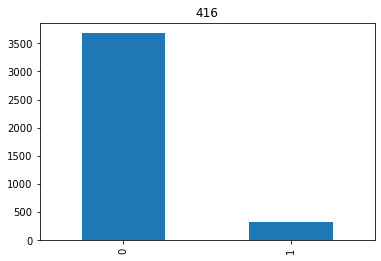

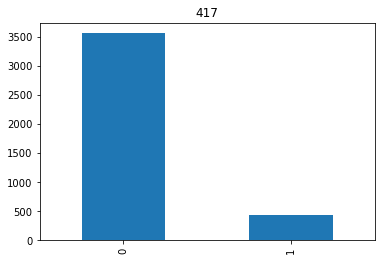

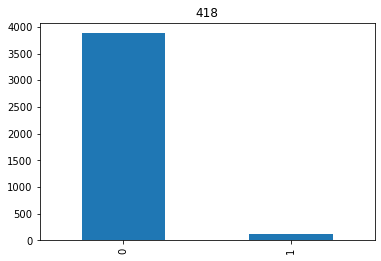

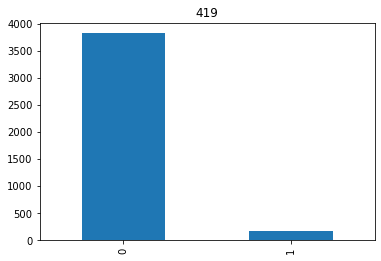

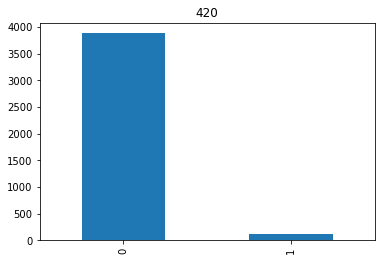

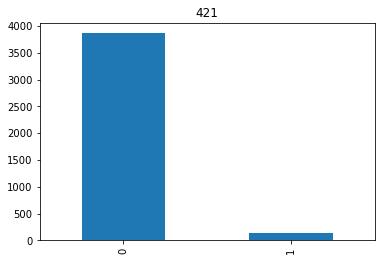

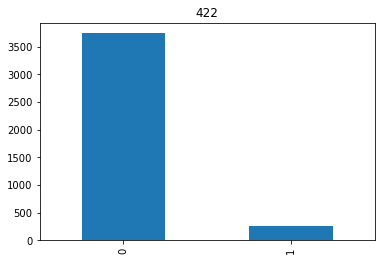

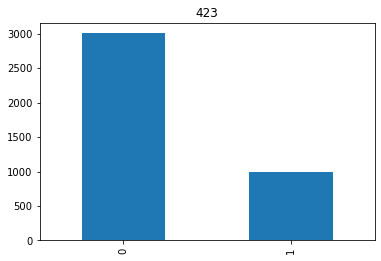

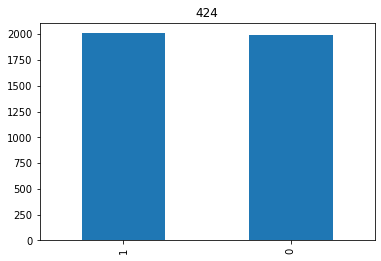

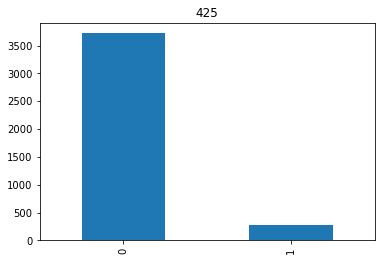

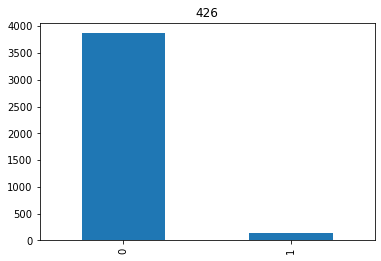

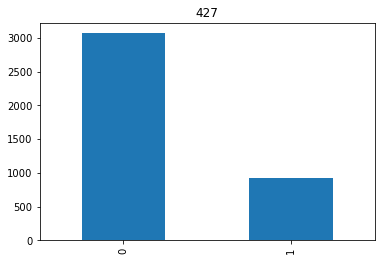

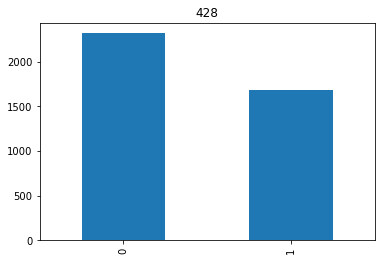

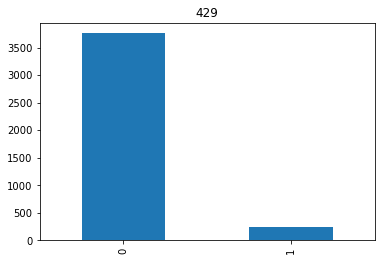

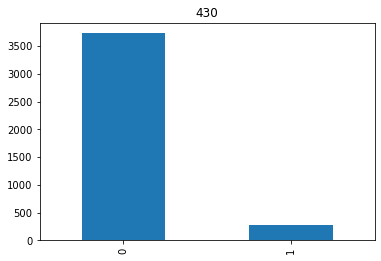

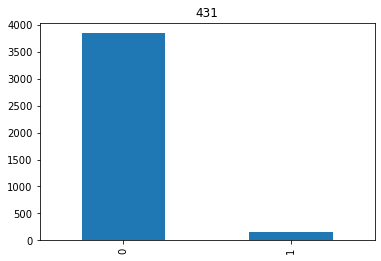

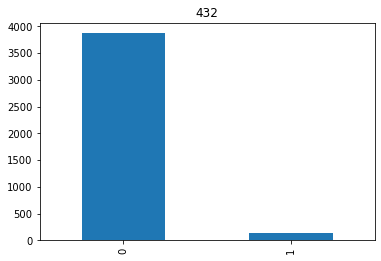

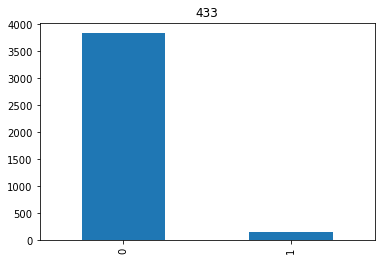

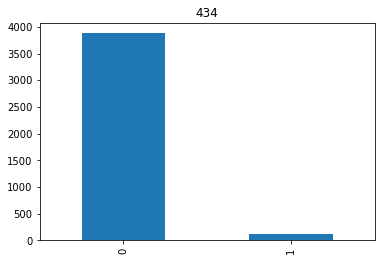

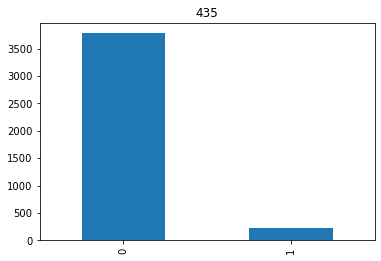

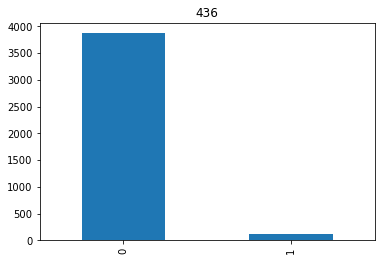

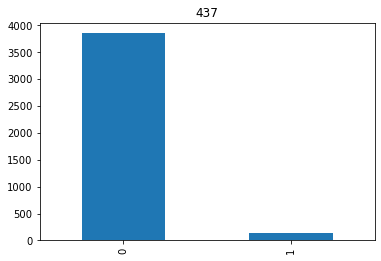

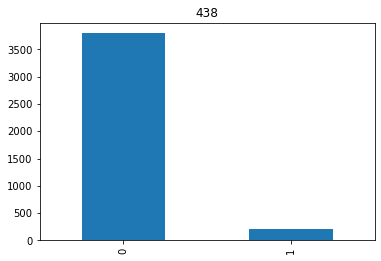

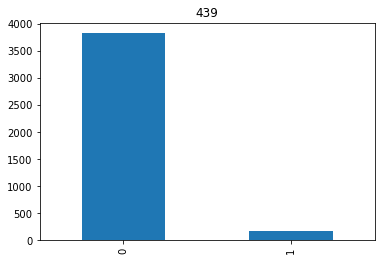

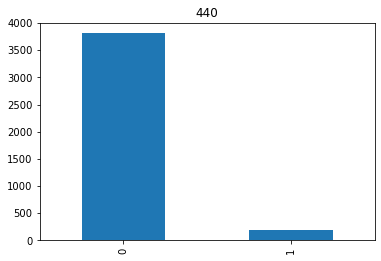

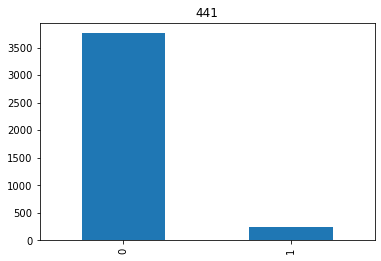

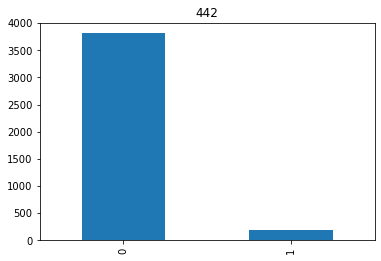

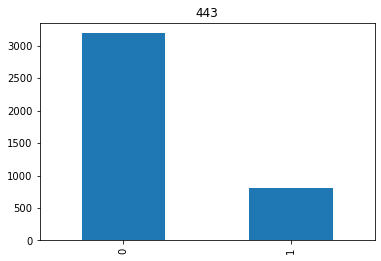

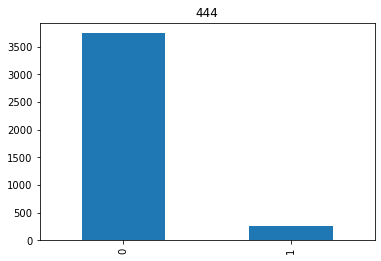

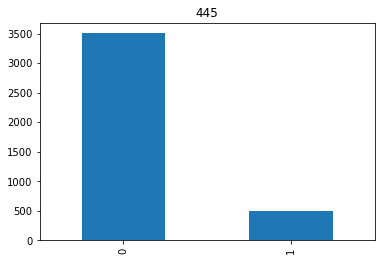

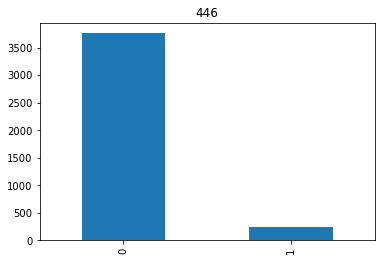

In [38]:
for col in locationTrain.columns:
    locationTrain[col].value_counts().plot(kind="bar",title=col)
    plt.show()

In [39]:
X= locationTrain.iloc[:,1:]
y=locationTrain["class"]
X_train,y_train,X_test,y_test,X_holdout,y_holdout = split_data(X,y)

### KNN

In [42]:
start_time = time.time()
knn1 = KNeighborsClassifier(n_neighbors=5, metric="hamming")
knn1.fit(X_train,y_train)
pred1 = knn1.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(knn1,X_holdout,y_holdout)
eval_metrics(y_test,pred1,type="multi")


--- runtime --- 3.2189950942993164
Cross validated scores: [0.23333333 0.23333333 0.23333333 0.28333333 0.28333333]
confusion matrix: [[15  0  0  0  1  0  0  5  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0  0  0  0  0  0]
 [ 0 20  0  0  0  1  0  0  0  0  0  0  1  1  0  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  1 18  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0  1  0]
 [ 0  0  1 20  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  1  0]
 [ 1  0  0  3  7  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  1  0]
 [ 6  3  0  0  1  5  0  4  0  3  0  1  1  0  1  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  1  1  0  7  3  0  1  0  1  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 3  0  3  1  0  2  1 32  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  1  0  1  0  2  1  3  1  3  1  1  2  0  0  1  0  1  1  0  0  1
   0  0  0  0  0  0]
 [ 7  1  1 

In [43]:
start_time = time.time()
knn2 = KNeighborsClassifier(n_neighbors=10, metric="hamming")
knn2.fit(X_train,y_train)
pred2 = knn2.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(knn2,X_holdout,y_holdout)
eval_metrics(y_test,pred2,type="multi")


--- runtime --- 3.1849989891052246
Cross validated scores: [0.21666667 0.25       0.28333333 0.38333333 0.23333333]
confusion matrix: [[19  0  0  0  0  0  0  3  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 21  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  1  0  0  0  0  0
   0  1  0  0  0  0]
 [ 0  1 19  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  0  0]
 [ 0  0  0  7  3  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  1  0]
 [ 4  3  0  1  0  5  0  5  0  4  0  0  1  1  1  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 1  0  0  0  0  1 11  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 2  1  2  0  0  1  0 37  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  1  0  1  1  2  1  1  0  1  1  0  2  0  0  0  0  0  5  1  0  1
   0  0  0  0  1  1]
 [ 6  1  1 

In [44]:
start_time = time.time()
knn3 = KNeighborsClassifier(n_neighbors=30, metric="hamming")
knn3.fit(X_train,y_train)
pred3 = knn3.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(knn3,X_holdout,y_holdout)
eval_metrics(y_test,pred3,type="multi")

--- runtime --- 4.804996728897095
Cross validated scores: [0.28333333 0.21666667 0.26666667 0.28333333 0.33333333]
confusion matrix: [[18  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  1  0  2  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0 18  0  0  0  0  1  0  0  1  1  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  2  0]
 [ 1  0  0  8  3  0  0  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 4  3  0  1  0  4  0  9  0  2  0  0  1  1  0  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 1  0  0  0  0  0 12  0  0  0  0  1  0  1  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 3  1  2  0  0  0  0 37  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  1  4  0  1  0  0  1  0  0  0  0  1  4  1  2  1
   0  0  0  1  0  1]
 [ 5  1  1  

### Decision Tree

In [45]:
start_time = time.time()
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X_train,y_train)
prediction = dtree.predict(X_test) 
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(dtree,X_holdout,y_holdout)
eval_metrics(y_test,prediction,type="multi")

--- runtime --- 0.5569977760314941
Cross validated scores: [0.16666667 0.18333333 0.18333333 0.13333333 0.2       ]
confusion matrix: [[ 7  0  0  1  0  1  0  2  0  3  0  3  0  0  2  0  1  0  0  0  0  0  1  0
   0  0  0  1  0  1]
 [ 0 14  1  0  0  1  1  1  0  0  1  0  2  0  0  0  0  0  0  0  1  0  0  0
   0  0  1  0  0  1]
 [ 0  1  5  0  0  2  0  3  0  2  0  1  0  0  2  1  0  0  0  1  0  1  0  0
   0  0  1  0  0  2]
 [ 0  0  0 11  4  0  0  0  1  0  0  0  0  0  0  0  0  2  0  0  0  3  1  0
   0  0  0  0  2  0]
 [ 1  0  0  2  1  0  0  3  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  2
   0  0  0  0  1  0]
 [ 1  2  0  0  0  4  0  1  0  3  0  0  0  0  2  0  3  2  2  0  1  0  0  0
   0  0  2  2  1  0]
 [ 3  0  0  0  0  0  6  1  0  0  0  2  0  0  0  0  1  0  0  0  0  0  0  1
   0  0  1  0  0  0]
 [ 2  0  0  0  0  0  1 20  1  3  2  2  0  0  3  1  0  0  1  0  1  1  0  4
   0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  3  1  2  0  1  0  0  0  0  1  2  2  0  1  1
   2  0  0  0  0  2]
 [ 5  0  0 

### Random forest

In [46]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100,random_state=0,criterion="gini",min_samples_split=5)
clf.fit(X_train,y_train)
rf_prediction = clf.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_holdout,y_holdout)
eval_metrics(y_test,rf_prediction,type="multi")

--- runtime --- 2.5349936485290527
Cross validated scores: [0.43333333 0.38333333 0.4        0.3        0.48333333]
confusion matrix: [[17  0  0  0  0  0  1  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0  0  1  0  0  0]
 [ 0  1 18  0  0  0  0  0  0  0  1  1  0  0  0  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  0  0]
 [ 0  0  0  3  9  0  0  0  0  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0
   0  0  0  0  0  0]
 [ 1  3  0  1  0  5  0  7  0  3  0  2  0  0  0  0  1  1  1  0  1  0  0  0
   0  0  0  0  0  0]
 [ 1  0  0  0  0  1  6  2  0  0  1  2  0  0  0  0  0  0  0  0  0  0  0  1
   0  0  0  1  0  0]
 [ 1  1  0  0  0  0  0 40  0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  4  1  0  1  1  0  2  0  1  0  0  1  3  0  2  2
   0  0  0  1  0  0]
 [ 6  1  1 

In [47]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100,random_state=0,criterion="entropy",min_samples_split=10)
clf.fit(X_train,y_train)
rf_prediction = clf.predict(X_test)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_holdout,y_holdout)
eval_metrics(y_test,rf_prediction,type="multi")

--- runtime --- 2.560997247695923
Cross validated scores: [0.28333333 0.28333333 0.35       0.31666667 0.28333333]
confusion matrix: [[20  0  0  0  0  0  0  1  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0
   1  0  0  0  0  0]
 [ 0 23  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0 17  0  0  0  0  1  0  0  1  1  0  0  1  0  0  0  1  0  0  0  0  0
   0  0  0  0  0  0]
 [ 0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  0
   0  0  0  0  0  0]
 [ 0  0  0  2 11  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0
   0  0  0  0  0  0]
 [ 2  3  0  1  0  4  0  9  0  0  1  2  0  0  1  0  0  0  2  1  0  0  0  0
   0  0  0  0  0  0]
 [ 2  0  0  0  0  1  4  3  0  0  0  2  0  0  0  0  0  0  0  0  0  0  1  1
   0  0  0  0  0  1]
 [ 1  1  0  0  0  0  0 41  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1
   0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  1  4  0  0  2  0  0  1  0  3  1  0  2  1  0  1  1
   0  0  0  1  0  1]
 [ 3  1  1  

### For kaggle

In [19]:
# model on all data
clf = RandomForestClassifier(n_estimators=100,random_state=0,criterion="entropy",min_samples_split=10)
clf.fit(X,y)
rf_prediction = clf.predict(locationTest)

# predict
result = pd.DataFrame(rf_prediction,index= locationTest.index)

result.columns = ["class"]
print(result)
result.to_csv("location_test_result_RF.csv")

      class
ID         
4000      4
4001     20
4002     15
4003     21
4004     19
...     ...
5004      8
5005     20
5006     10
5007     20
5008      4

[1009 rows x 1 columns]


## Census income data

(from ex0)

In [53]:
income = pd.read_csv("../Exercise0/Dataset1/adult.data",index_col=False, names = ["age","workclass","fnlwgt","education","education_num","marital_status","occupation","relationship","race","sex","capital_gain","capital_loss","hours_per_week","native_country","income"])
income.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [114]:
income.shape

(32561, 15)

In [149]:
income.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [151]:
income.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [54]:
for c in income[["workclass","marital_status","occupation","relationship","race","sex","native_country","income"]]:
    
    print( "---- %s ---" % c)
    print(income[c].value_counts(), "\n\n")

---- workclass ---
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64 


---- marital_status ---
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital_status, dtype: int64 


---- occupation ---
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces        

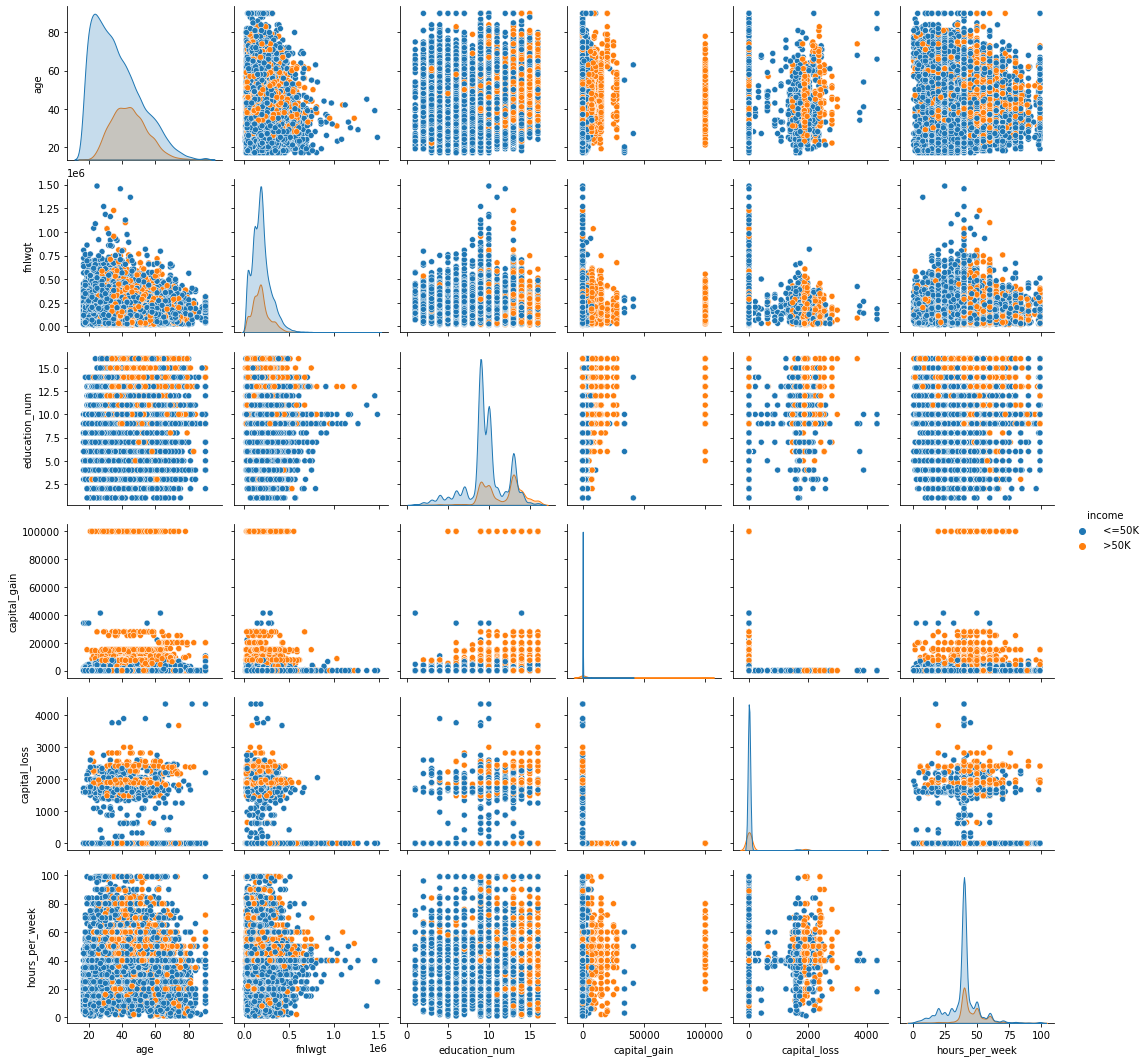

In [131]:
pairplot(income,hue="income")
plt.show()

In [55]:
#onehot
income_dummy = pd.get_dummies(income, columns= ["workclass","education","marital_status","occupation","relationship","race","sex","native_country","income"],
drop_first=True)
income_dummy.drop("education_num",axis=1,inplace=True) # not needed anymore

C:\Users\Lini\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


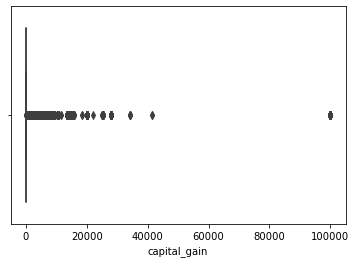

In [56]:
sns.boxplot(income_dummy["capital_gain"])
plt.show()


There are obviously some values that hugely differ from the rest. So either the values at 99999 are encoded as missing values or they are outliers. But probably missing values since they are exactly the same.

In [28]:
# count these high values
(income_dummy.capital_gain == 99999).sum()

159

In [57]:
# first set the values to missing
income_dummy.loc[income_dummy.capital_gain == 99999, "capital_gain"] = np.nan

In [58]:
income_dummy.isna().sum().sum()

159

In [60]:
income_dummy.head()

,age,fnlwgt,capital_gain,capital_loss,hours_per_week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,native_country_ Puerto-Rico,native_country_ Scotland,native_country_ South,native_country_ Taiwan,native_country_ Thailand,native_country_ Trinadad&Tobago,native_country_ United-States,native_country_ Vietnam,native_country_ Yugoslavia,income_ >50K
0,39,77516,2174.0,0,40,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,0.0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,0.0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,0.0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,0.0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Split data into training and test set for modelling:

In [61]:
y = income_dummy['income_ >50K']
X = income_dummy.drop('income_ >50K', axis=1)

X_train,y_train,X_test,y_test,X_holdout,y_holdout = split_data(X,y)

In [63]:
X_train.isna().sum().sum()

123

In [64]:
X_test.isna().sum().sum()

22

In [65]:
X_holdout.isna().sum().sum()

14

In [113]:
# then impute them by nearest neighbours

imputer = KNNImputer(n_neighbors=3)
X_train_imp = imputer.fit_transform(X_train)
X_train_imp = pd.DataFrame(X_train_imp,columns= X_train.columns)

imputer = KNNImputer(n_neighbors=3)
X_test_imp = imputer.fit_transform(X_test)
X_test_imp = pd.DataFrame(X_test_imp,columns= X_test.columns)

imputer = KNNImputer(n_neighbors=3)
X_hold_imp = imputer.fit_transform(X_holdout)
X_hold_imp = pd.DataFrame(X_hold_imp,columns= X_holdout.columns)

In [114]:
y_train.value_counts()

0    18539
1     5881
Name: income, dtype: int64

### Decision Tree

In [115]:
start_time = time.time()
clf = DecisionTreeClassifier(random_state=0,criterion="entropy",max_features=5) 
clf=clf.fit(X_train_imp,y_train) 
prediction = clf.predict(X_test_imp )
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_hold_imp,y_holdout)

eval_metrics(y_test, prediction)


--- runtime --- 0.12500309944152832
Cross validated scores: [0.75869121 0.7791411  0.81390593 0.82172131 0.79918033]
confusion matrix: [[3769  557]
 [ 535  837]]
accuracy: 0.8083538083538083
precision: 0.6004304160688666
recall: 0.6100583090379009
F1: 0.6052060737527115


### Random forest

In [117]:
start_time = time.time()
clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_train_imp,y_train)
rf_prediction = clf.predict(X_test_imp)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_hold_imp,y_holdout)

eval_metrics(y_test, rf_prediction)


--- runtime --- 3.846982002258301
Cross validated scores: [0.85071575 0.84253579 0.85889571 0.83401639 0.83811475]
confusion matrix: [[4044  282]
 [ 524  848]]
accuracy: 0.8585468585468585
precision: 0.7504424778761062
recall: 0.6180758017492711
F1: 0.6778577138289368


### KNN

In [118]:
# scale data

column_transformer = make_column_transformer(
    (StandardScaler(), ['age', 'fnlwgt','capital_gain', 'capital_loss', 'hours_per_week']),
    remainder='passthrough')

X_train_sc = column_transformer.fit_transform(X_train_imp)
X_test_sc = column_transformer.fit_transform(X_test_imp)
X_hold_sc = column_transformer.fit_transform(X_hold_imp)

In [119]:
knn = KNeighborsClassifier(n_neighbors=5)

start_time = time.time()
knn.fit(X_train_sc,y_train)
knn_prediction= knn.predict(X_test_sc) 
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(knn,X_hold_sc,y_holdout)

eval_metrics(y_test, knn_prediction)


--- runtime --- 3.724005699157715
Cross validated scores: [0.81390593 0.81390593 0.7791411  0.79918033 0.79508197]
confusion matrix: [[3921  405]
 [ 584  788]]
accuracy: 0.8264303264303264
precision: 0.6605196982397318
recall: 0.5743440233236151
F1: 0.6144249512670564


### NB

In [120]:
start_time = time.time()
nb = GaussianNB()
nb.fit(X_train_imp,y_train)
nb_pred = nb.predict(X_test_imp)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(nb,X_hold_imp,y_holdout)

eval_metrics(y_test, nb_pred)


--- runtime --- 0.035976409912109375
Cross validated scores: [0.78732106 0.78732106 0.80368098 0.80942623 0.79713115]
confusion matrix: [[4103  223]
 [ 949  423]]
accuracy: 0.7943137943137943
precision: 0.6547987616099071
recall: 0.30830903790087466
F1: 0.4192269573835481


## Try the same using label encoding:

In [76]:
income_label = income.copy()

for col in ["workclass","marital_status","occupation","relationship","race","sex","native_country","income"]:
    le = LabelEncoder()
    le.fit(income_label[col])
    income[col] = le.transform(income_label[col])


income_label.drop("education",axis=1,inplace=True) # not needed anymore
income_label

,age,workclass,fnlwgt,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,7,77516,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,13,2,10,5,2,0,0,0,40,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,12,2,13,5,4,0,0,0,38,39,0
32557,40,4,154374,9,2,7,0,4,1,0,0,40,39,1
32558,58,4,151910,9,6,1,4,4,0,0,0,40,39,0
32559,22,4,201490,9,4,1,3,4,1,0,0,20,39,0


In [95]:
y = income_label['income']
X = income_label.drop('income', axis=1)

X_train,y_train,X_test,y_test,X_holdout,y_holdout = split_data(X,y)

In [96]:
imputer = KNNImputer(n_neighbors=3)
X_train_imp = imputer.fit_transform(X_train)
X_train_imp = pd.DataFrame(X_train_imp,columns= X_train.columns)

imputer = KNNImputer(n_neighbors=3)
X_test_imp = imputer.fit_transform(X_test)
X_test_imp = pd.DataFrame(X_test_imp,columns= X_test.columns)

imputer = KNNImputer(n_neighbors=3)
X_hold_imp = imputer.fit_transform(X_holdout)
X_hold_imp = pd.DataFrame(X_hold_imp,columns= X_holdout.columns)

In [112]:
start_time = time.time()
clf = DecisionTreeClassifier(random_state=0,criterion="entropy",max_features=5) 
clf=clf.fit(X_train_imp,y_train) 
prediction = clf.predict(X_test_imp )
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(clf,X_hold_imp,y_holdout)

eval_metrics(y_test, prediction)


--- runtime --- 0.15099143981933594
Cross validated scores: [0.75869121 0.7791411  0.81390593 0.82172131 0.79918033]
confusion matrix: [[3769  557]
 [ 535  837]]
accuracy: 0.8083538083538083
precision: 0.6004304160688666
recall: 0.6100583090379009
F1: 0.6052060737527115


In [111]:
clf = RandomForestClassifier(n_estimators=100,random_state=0)
clf.fit(X_train_imp,y_train)
rf_prediction = clf.predict(X_test_imp)

cv_holdout(clf,X_hold_imp,y_holdout)

eval_metrics(y_test, rf_prediction)

Cross validated scores: [0.85071575 0.84253579 0.85889571 0.83401639 0.83811475]
confusion matrix: [[4044  282]
 [ 524  848]]
accuracy: 0.8585468585468585
precision: 0.7504424778761062
recall: 0.6180758017492711
F1: 0.6778577138289368


In [81]:
# scale data

column_transformer = make_column_transformer(
    (StandardScaler(), ['age', 'fnlwgt','capital_gain', 'capital_loss', 'hours_per_week']),
    remainder='passthrough')

X_train_sc = column_transformer.fit_transform(X_train_imp)
X_test_sc = column_transformer.fit_transform(X_test_imp)
X_hold_sc = column_transformer.fit_transform(X_hold_imp)

In [110]:
knn = KNeighborsClassifier(n_neighbors=5)

start_time = time.time()
knn.fit(X_train_sc,y_train)
knn_prediction= knn.predict(X_test_sc) 
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(knn,X_hold_sc,y_holdout)

eval_metrics(y_test, knn_prediction)

--- runtime --- 4.871996879577637
Cross validated scores: [0.81390593 0.81390593 0.7791411  0.79918033 0.79508197]
confusion matrix: [[3921  405]
 [ 584  788]]
accuracy: 0.8264303264303264
precision: 0.6605196982397318
recall: 0.5743440233236151
F1: 0.6144249512670564


In [108]:
start_time = time.time()
nb = GaussianNB()
nb.fit(X_train_imp,y_train)
nb_pred = nb.predict(X_test_imp)
print("--- runtime ---" , (time.time() - start_time))

cv_holdout(nb,X_hold_imp,y_holdout)

eval_metrics(y_test, nb_pred)

--- runtime --- 0.02795720100402832
Cross validated scores: [0.78732106 0.78732106 0.80368098 0.80942623 0.79713115]
confusion matrix: [[4103  223]
 [ 949  423]]
accuracy: 0.7943137943137943
precision: 0.6547987616099071
recall: 0.30830903790087466
F1: 0.4192269573835481


## Eucalyptus